In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from datetime import datetime, timedelta, time, date
from beyourself.core.util import *



In [22]:
import numpy.polynomial.polynomial as poly


In [42]:
def poly_fit(signal,order):
    signal = np.ravel(signal)
    x = range(len(signal))
    x = np.linspace(x[0], x[-1], num=len(x))
    coefs = poly.polyfit(x, signal, order)
#     x_new = range(len(x))
#     x_new = np.linspace(x_new[0], x_new[-1], num=len(x_new))
#     ffit = poly.polyval(x_new, coefs)
#     plt.plot(x_new, ffit)
    return coefs

/Users/shibozhang/anaconda/lib/python3.6/site-packages/numpy/polynomial/polynomial.py:1407: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


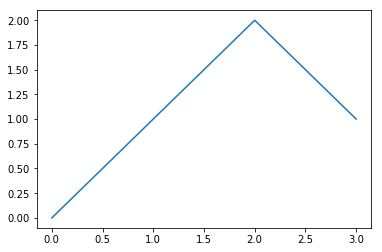

In [51]:
accx = np.array([0,1,2,1])
coefs = poly_fit(accx, 5)

In [52]:
coefs

array([ -1.12066315e-15,   7.92901837e-01,   2.18821042e-01,
         1.37357882e-02,  -1.52314512e-02,  -1.02272166e-02])

In [54]:
# Example Usage:
# python sg.py position.dat 7 2

import math
import sys

import numpy as np
import numpy.linalg
import pylab as py

def sg_filter(x, m, k=0):
    """
    x = Vector of sample times
    m = Order of the smoothing polynomial
    k = Which derivative
    """
    mid = len(x) / 2        
    a = x - x[mid]
    expa = lambda x: map(lambda i: i**x, a)    
    A = np.r_[map(expa, range(0,m+1))].transpose()
    Ai = np.linalg.pinv(A)

    return Ai[k]

def smooth(x, y, size=5, order=2, deriv=0):

    if deriv > order:
        print("deriv must be <= order")

    n = len(x)
    m = size

    result = np.zeros(n)

    for i in xrange(m, n-m):
        start, end = i - m, i + m + 1
        f = sg_filter(x[start:end], order, deriv)
        result[i] = np.dot(f, y[start:end])

    if deriv > 1:
        result *= math.factorial(deriv)

    return result

def plot(t, plots):
    n = len(plots)

    for i in range(0,n):
        label, data = plots[i]

        plt = py.subplot(n, 1, i+1)
        plt.tick_params(labelsize=8)
        py.grid()
        py.xlim([t[0], t[-1]])
        py.ylabel(label)

        py.plot(t, data, 'k-')

    py.xlabel("Time")

def create_figure(size, order):
    fig = py.figure(figsize=(8,6))
    nth = 'th'
    if order < 4:
        nth = ['st','nd','rd','th'][order-1]

    title = "%s point smoothing" % size
    title += ", %d%s degree polynomial" % (order, nth)

    fig.text(.5, .92, title,
             horizontalalignment='center')

def load(name):
    f = open(name)    
    dat = [map(float, x.split(' ')) for x in f]
    f.close()

    xs = [x[0] for x in dat]
    ys = [x[1] for x in dat]

    return np.array(xs), np.array(ys)

def plot_results(data, size, order):
    t, pos = load(data)
    params = (t, pos, size, order)

    plots = [
        ["Position",     pos],
        ["Velocity",     smooth(*params, deriv=1)],
        ["Acceleration", smooth(*params, deriv=2)]
    ]

    create_figure(size, order)
    plot(t, plots)

if __name__ == '__main__':
    data = sys.argv[1]
    size = int(sys.argv[2])
    order = int(sys.argv[3])

    plot_results(data, size, order)
    py.show()

ValueError: invalid literal for int() with base 10: '/Users/shibozhang/Library/Jupyter/runtime/kernel-e9939d05-677a-4d55-9234-616ba137dc09.json'

In [56]:
a = np.array([1,1,1,12])
a-1

array([ 0,  0,  0, 11])

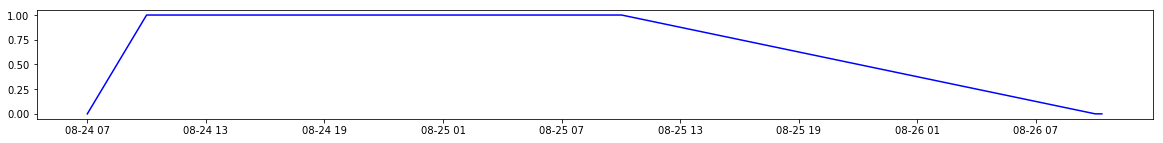

In [64]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20,2)
pred_x = [0,0,1,1,3]
pred_y = [0,1,1,0,0]

pred_x = [datetime_from_str("2017-08-24 07:00:00.000"), 
                   datetime_from_str("2017-08-24 10:00:00.000"),
                 datetime_from_str("2017-08-25 10:02:00.000"), 
                   datetime_from_str("2017-08-26 10:00:00.000"),
                 datetime_from_str("2017-08-26 10:20:00.000")]
ax1.plot(pred_x, pred_y,'b', label='pmin')


/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_08.csv
Shape of training data: (1197, 63)
Shape of Predicted: (1197,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_09.csv
Shape of training data: (1196, 63)
Shape of Predicted: (1196,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_10.csv
Shape of training data: (1198, 63)
Shape of Predicted: (1198,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_11.csv
Shape of training data: (1196, 63)
Shape of Predicted: (1196,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_12.csv
Shape of training data: (1198, 63)
Shape of Predicted: (1198,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_13.csv
Shape of training data: (1197, 63)
Shape of Predicted: (1197,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_15.csv
S

/Users/shibozhang/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Shape of Predicted: (1197,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-05-17_21.csv
Shape of training data: (421, 63)
Shape of Predicted: (421,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-06-17_06.csv
Shape of training data: (626, 63)
Shape of Predicted: (626,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-06-17_07.csv
Shape of training data: (1196, 63)
Shape of Predicted: (1196,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-06-17_08.csv
Shape of training data: (1199, 63)
Shape of Predicted: (1199,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-06-17_09.csv
Shape of training data: (1196, 63)
Shape of Predicted: (1196,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr/09-06-17_10.csv
Shape of training data: (828, 63)
Shape of Predicted: (828,)
 
/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/

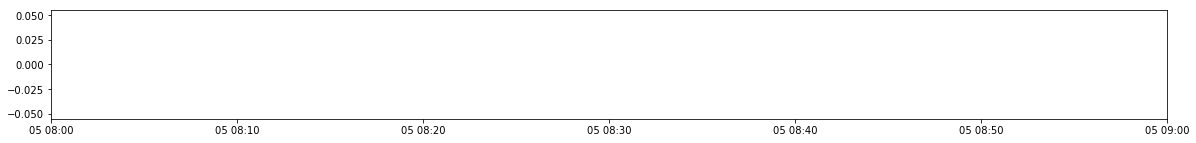

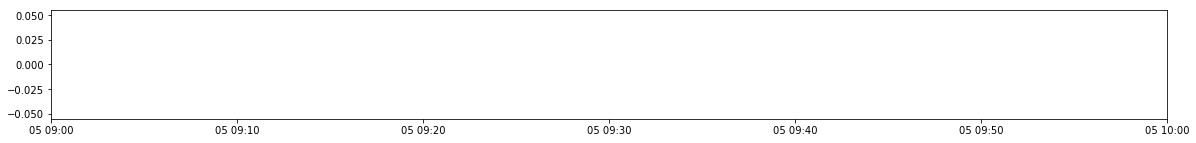

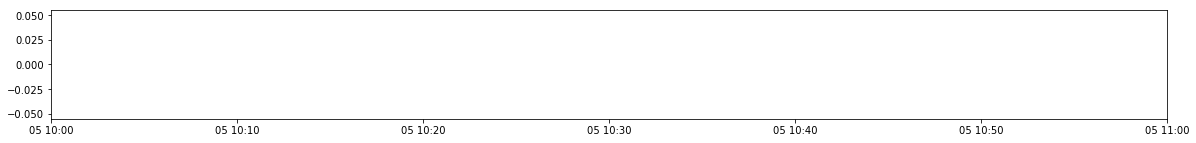

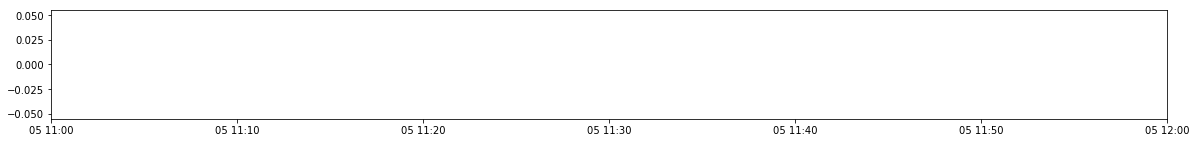

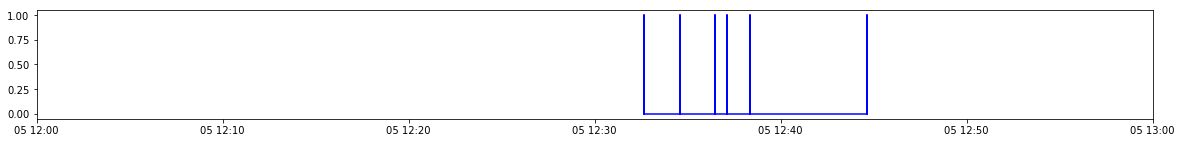

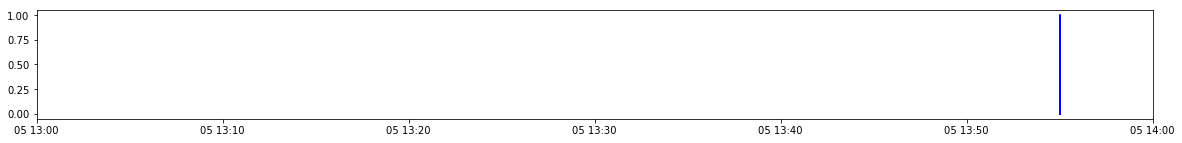

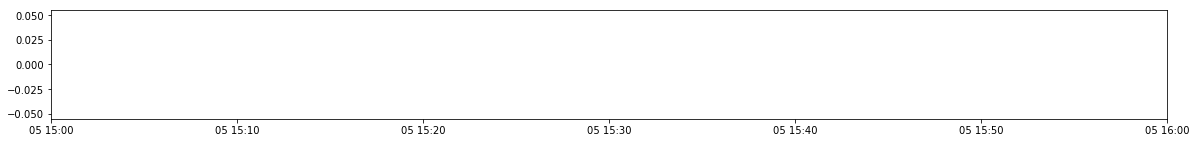

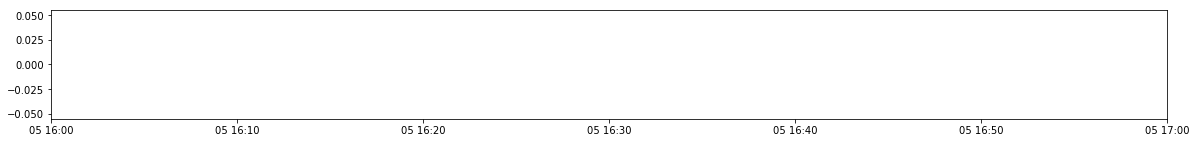

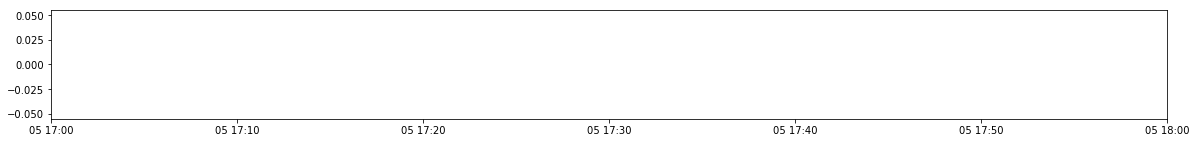

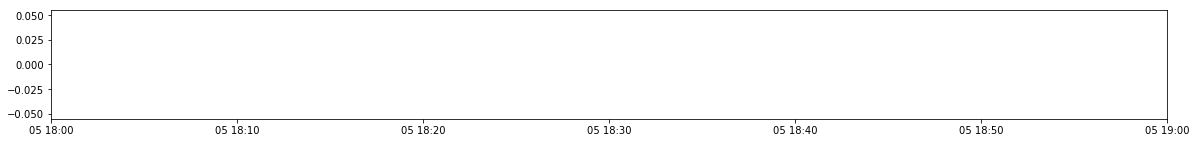

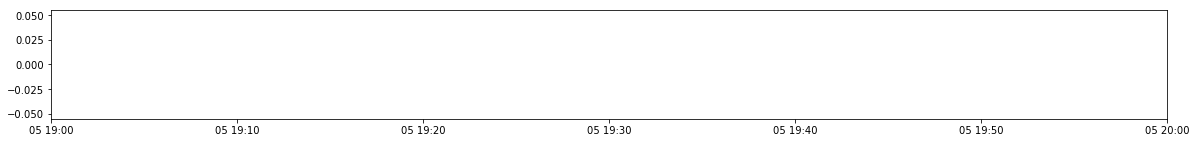

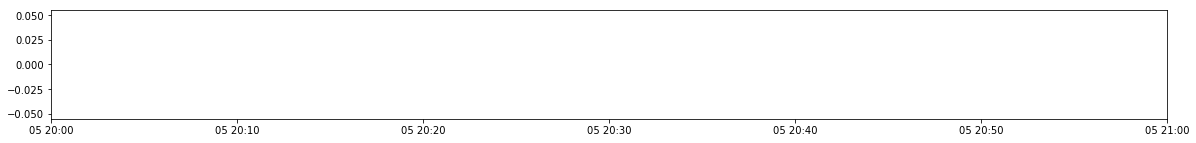

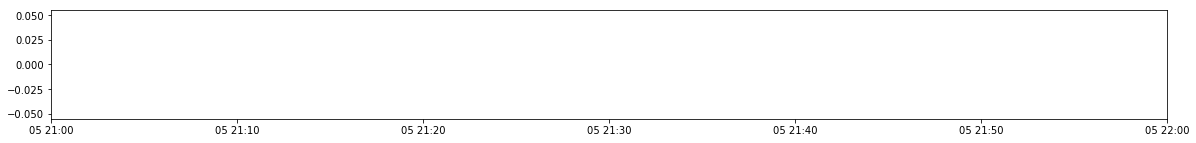

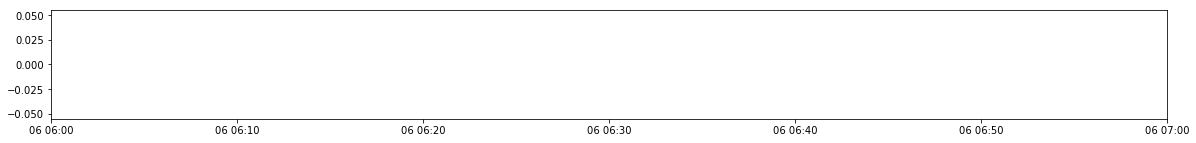

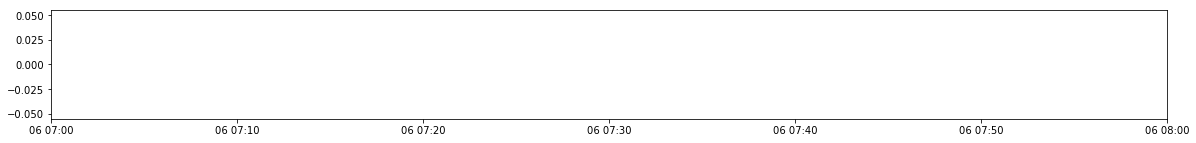

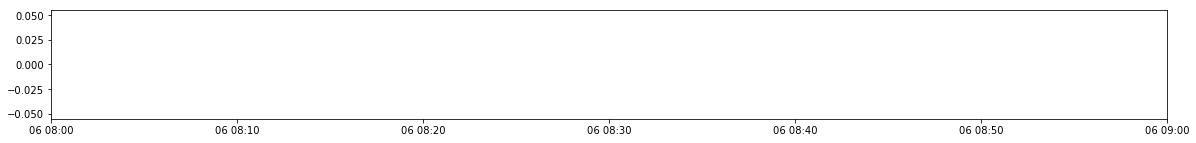

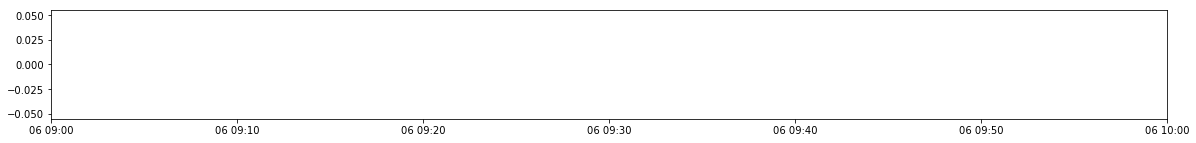

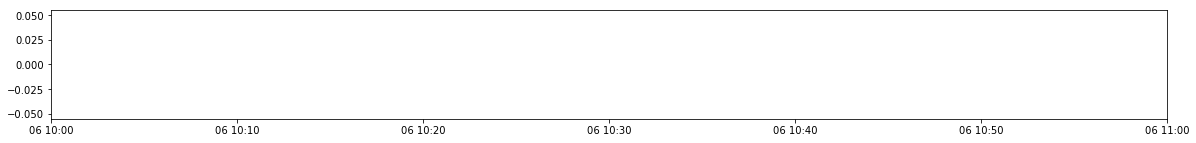

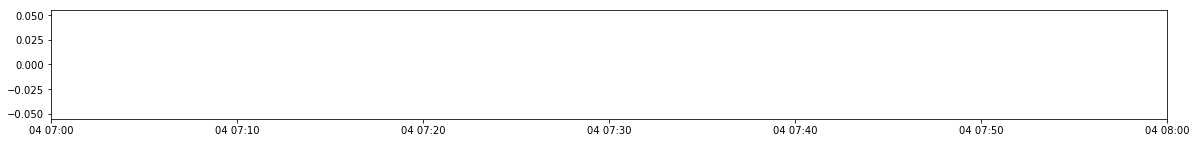

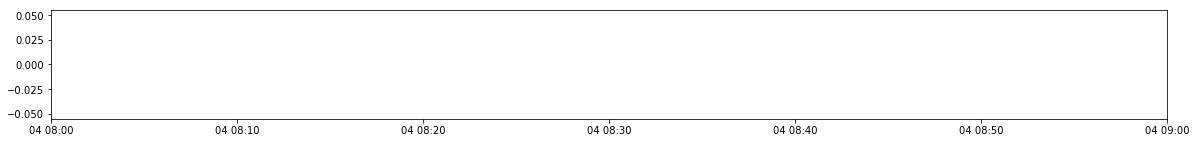

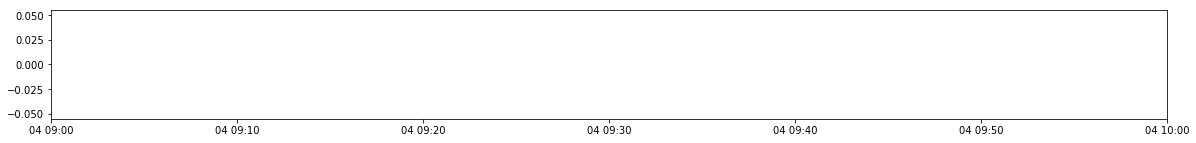

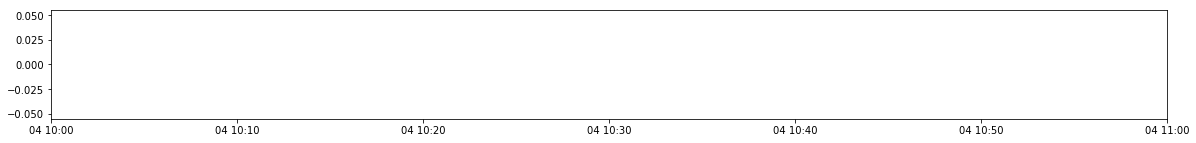

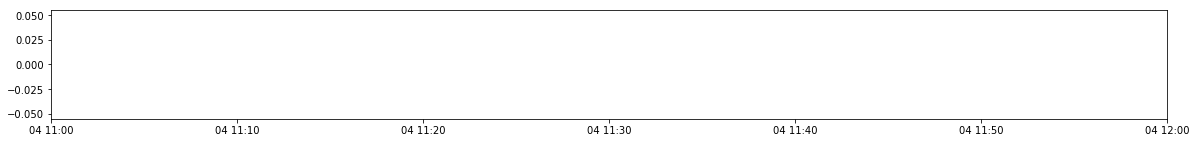

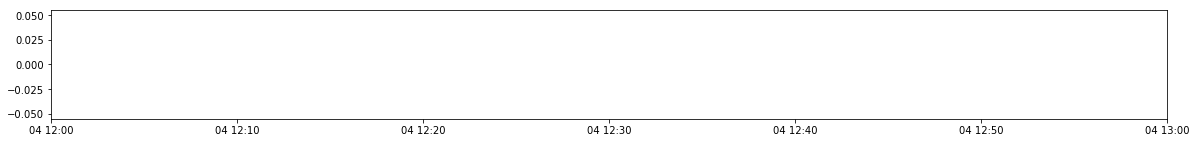

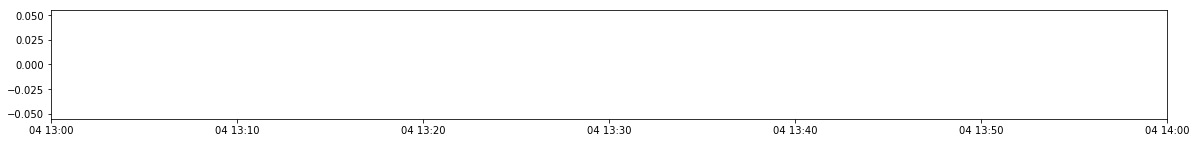

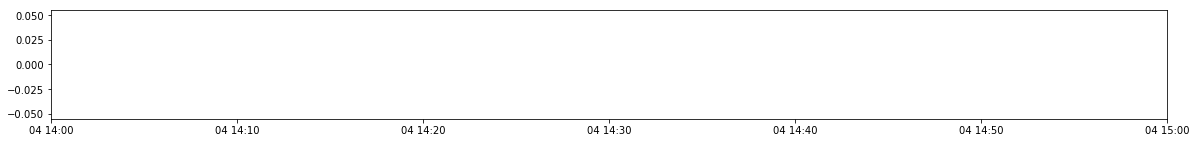

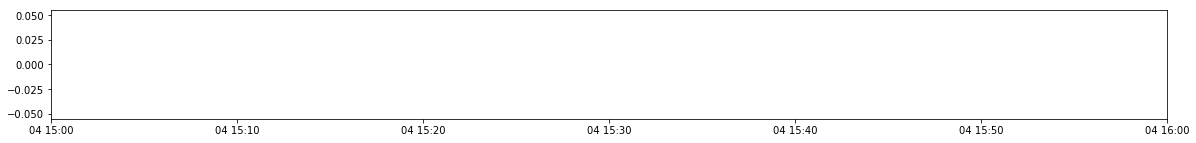

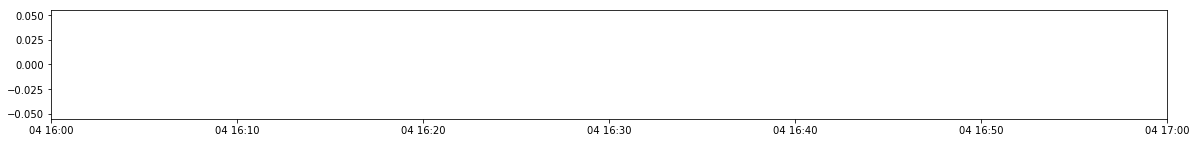

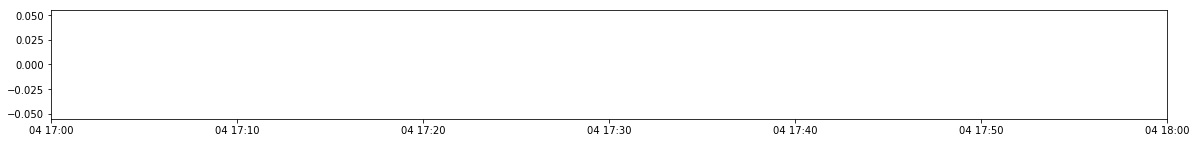

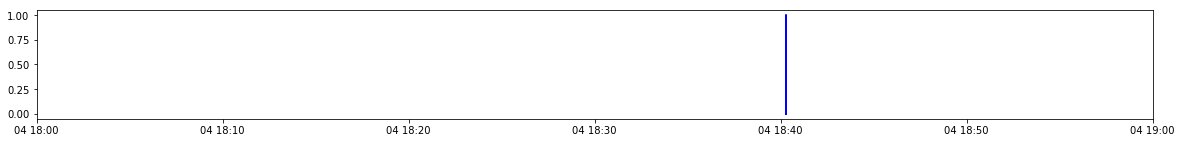

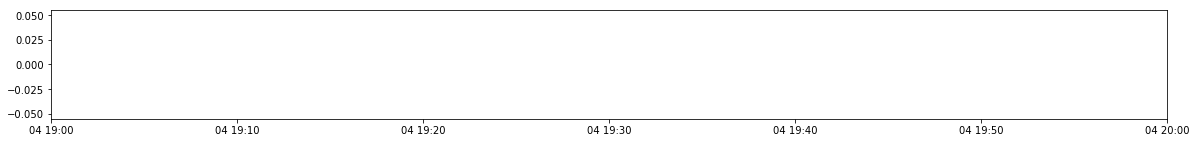

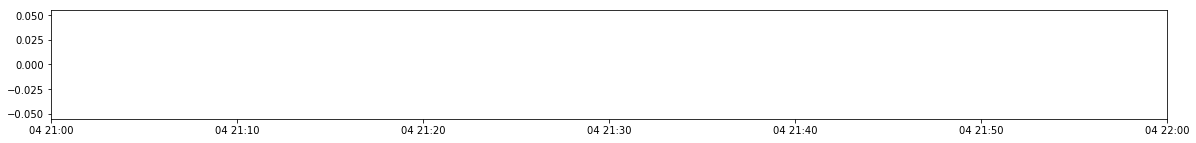

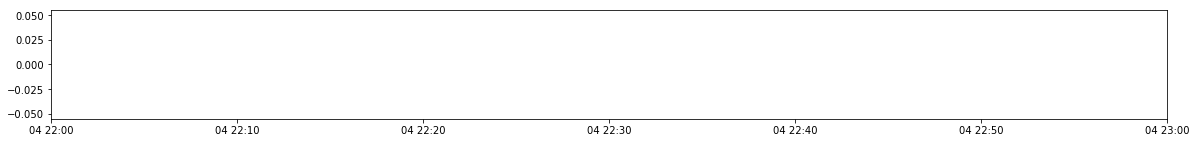

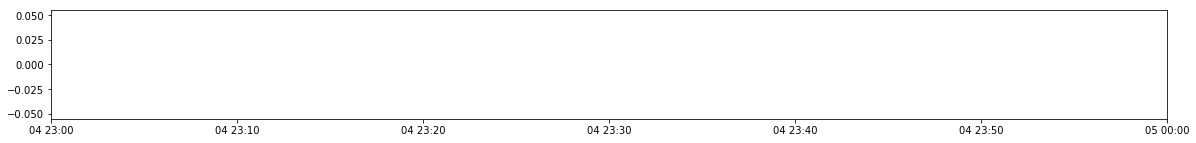

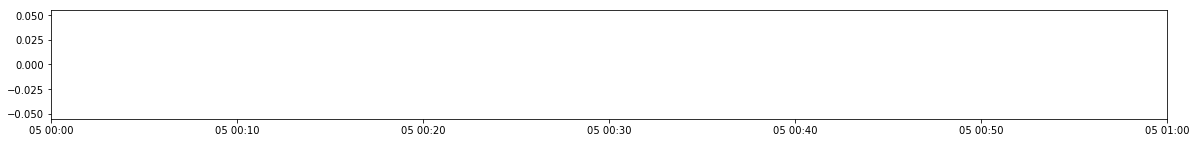

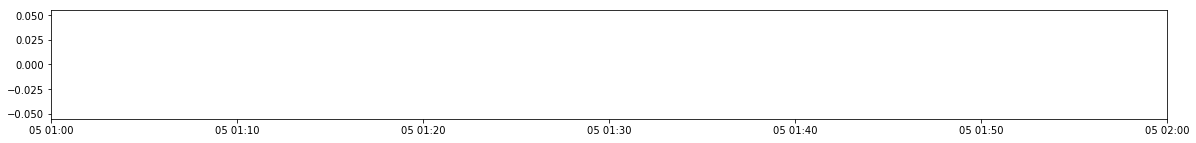

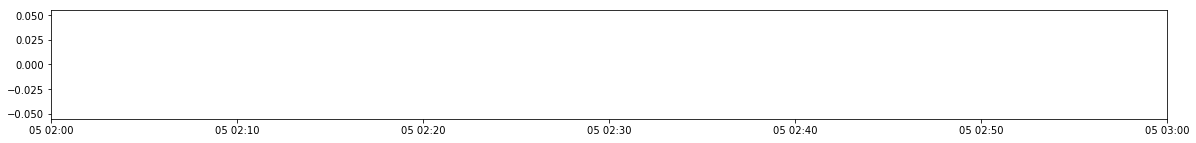

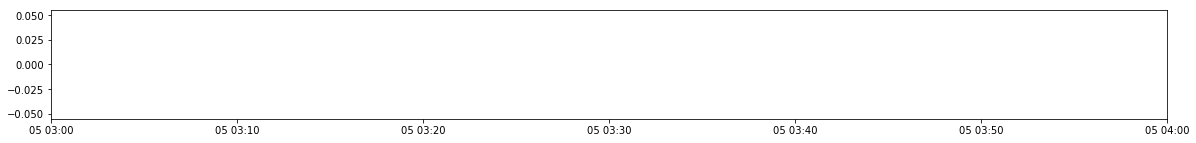

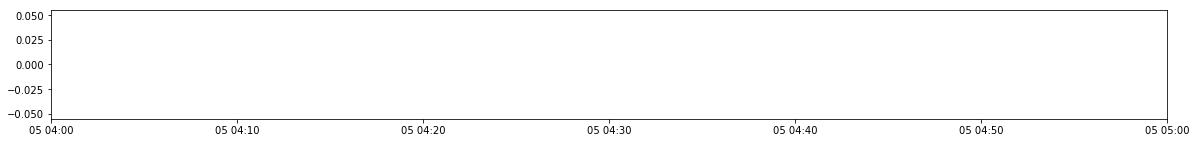

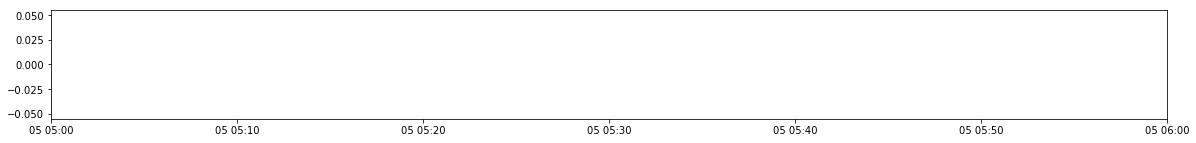

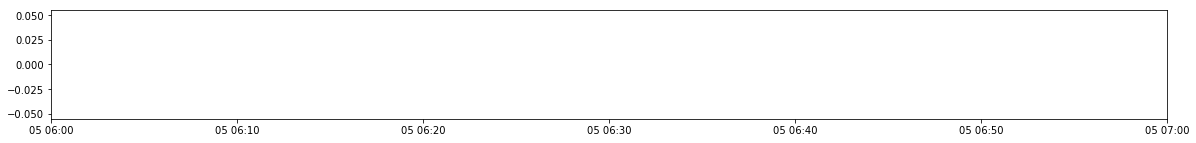

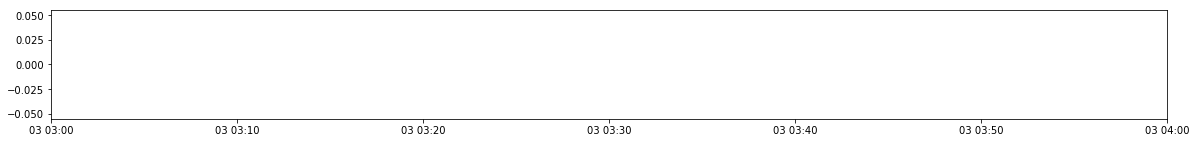

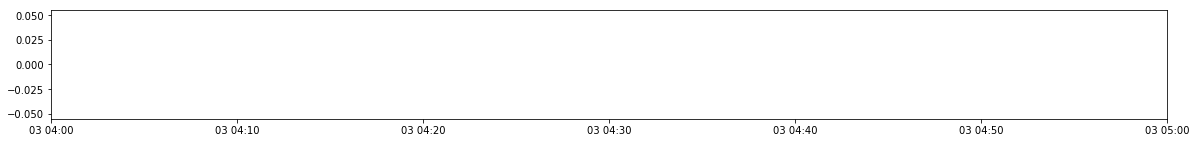

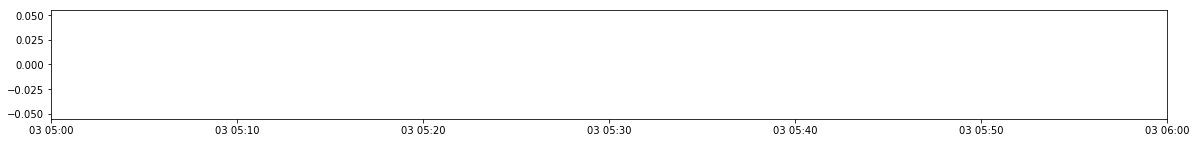

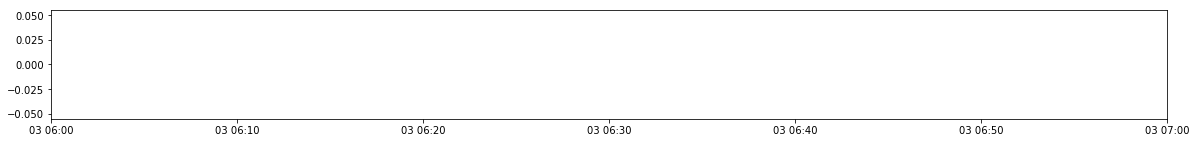

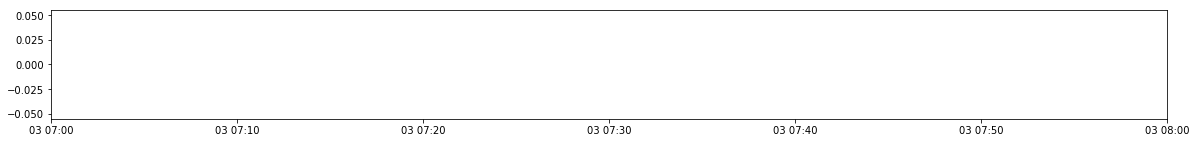

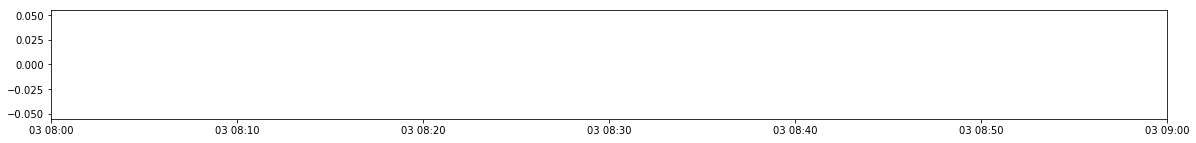

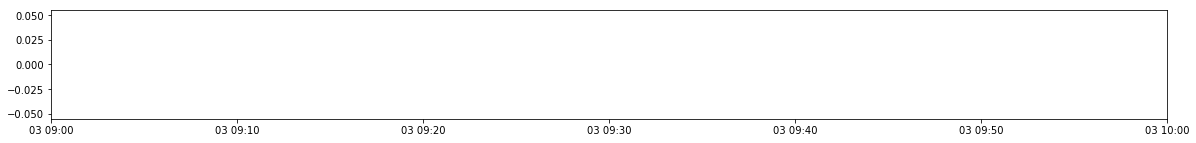

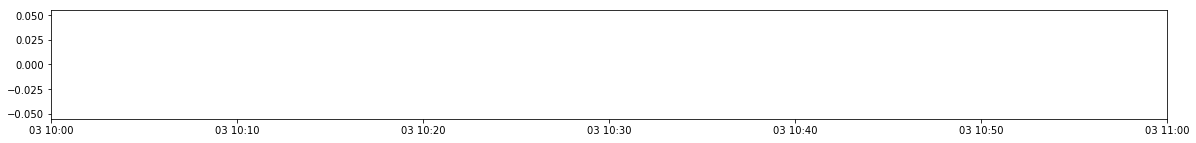

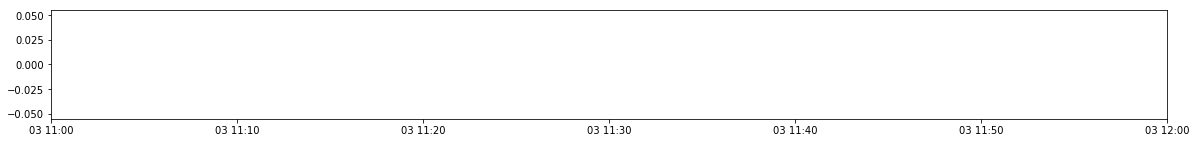

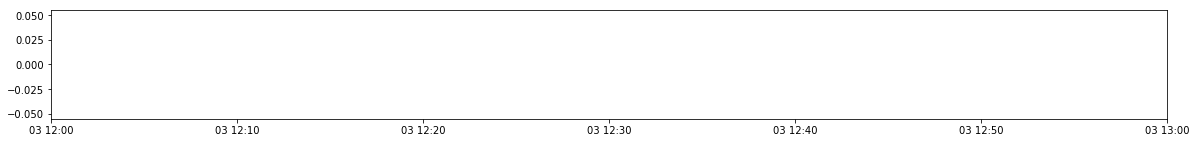

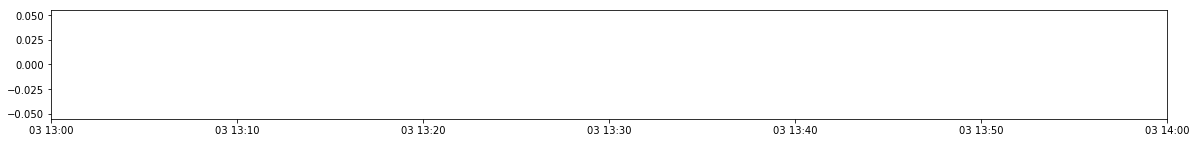

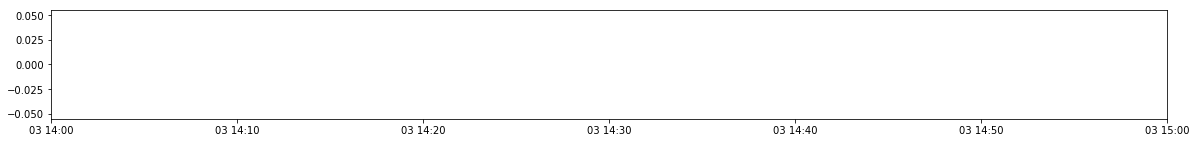

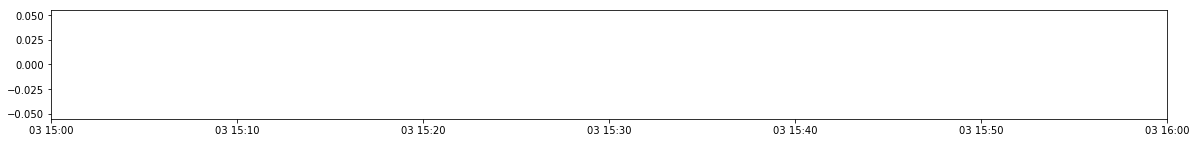

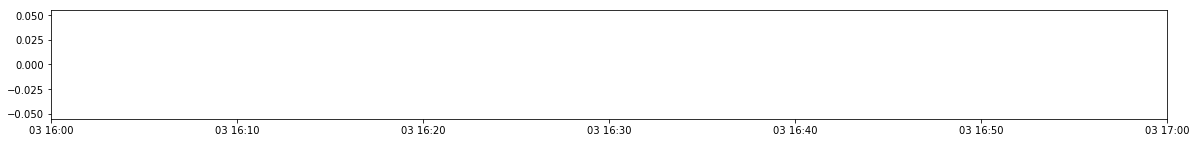

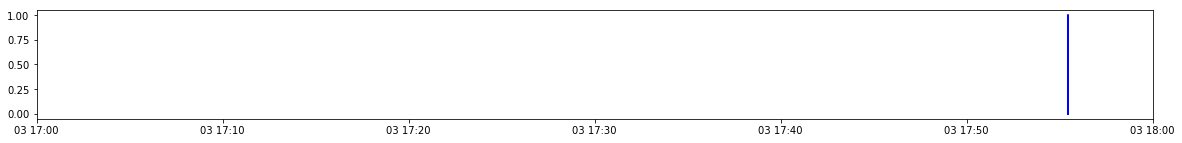

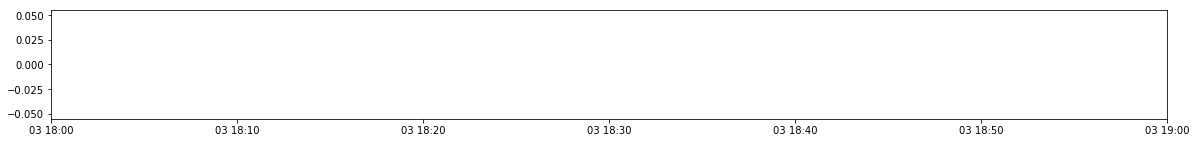

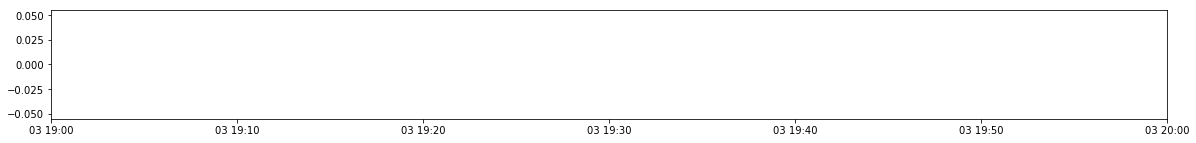

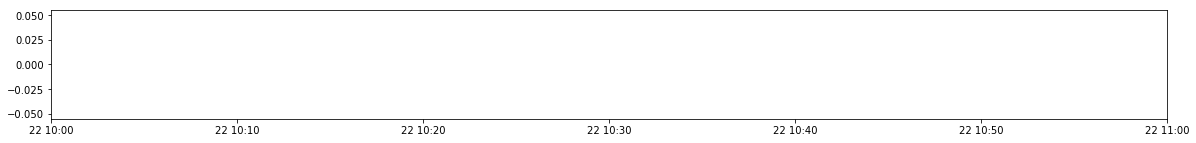

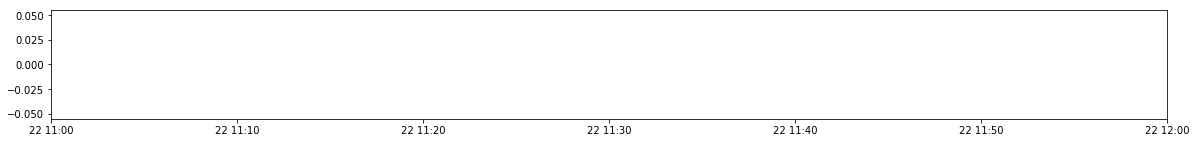

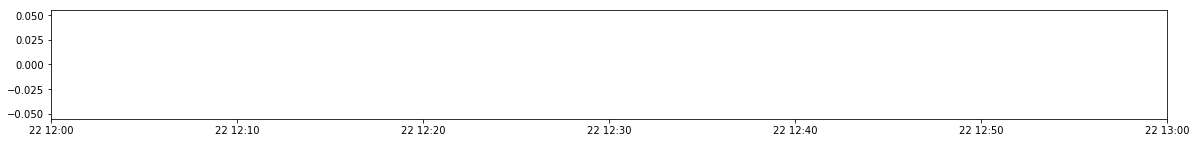

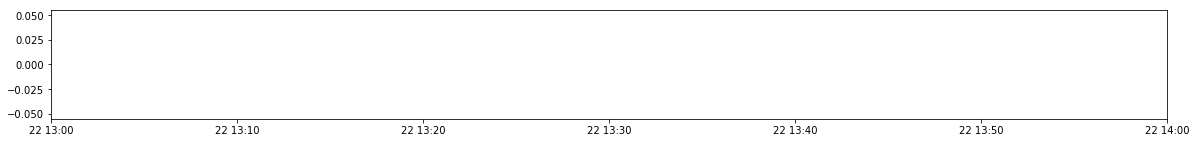

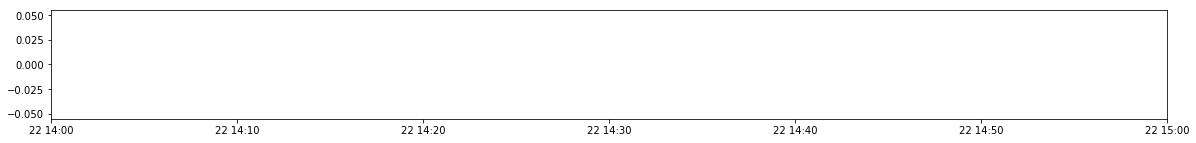

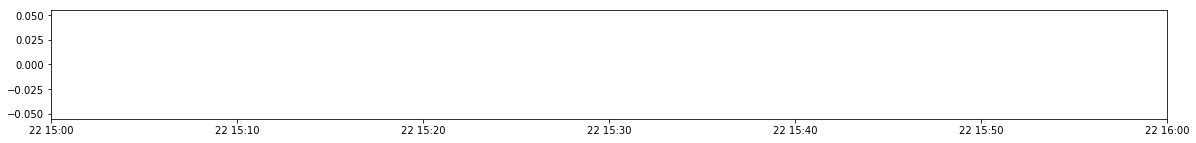

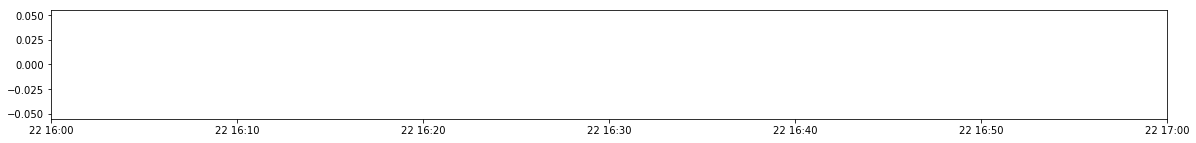

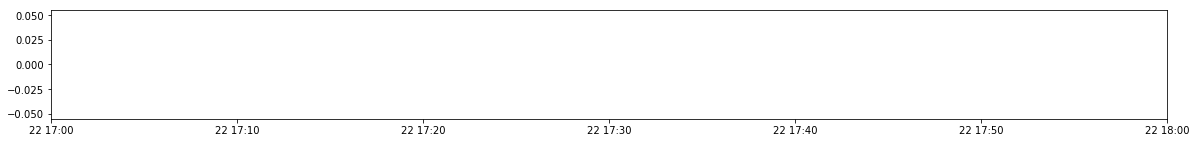

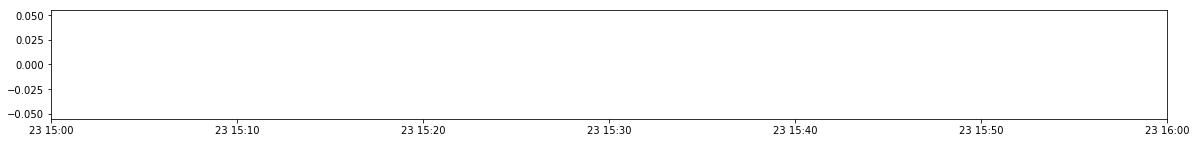

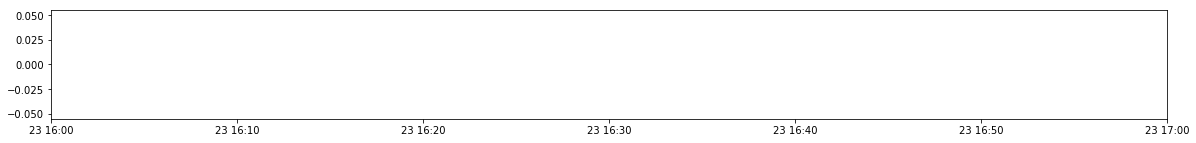

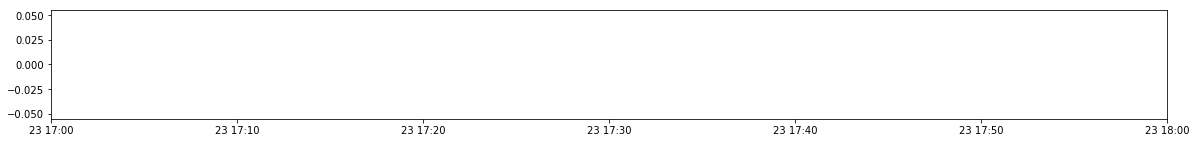

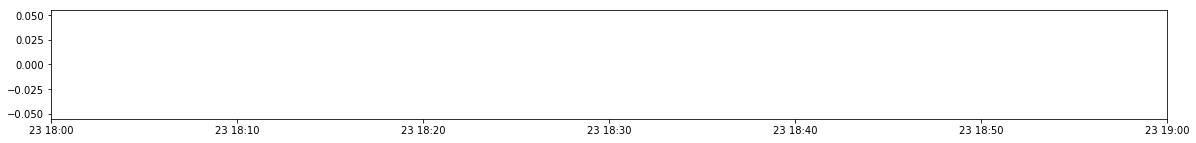

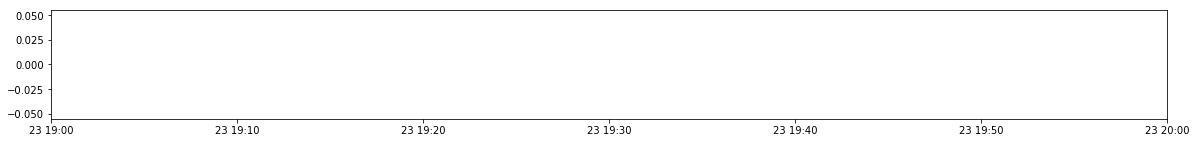

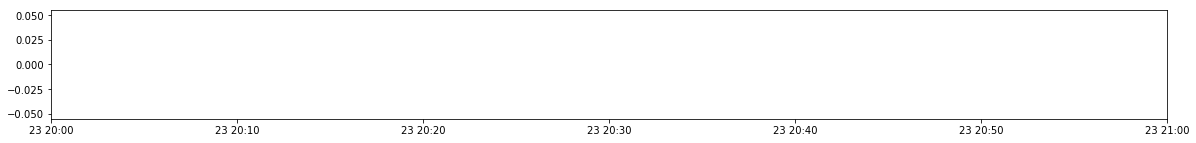

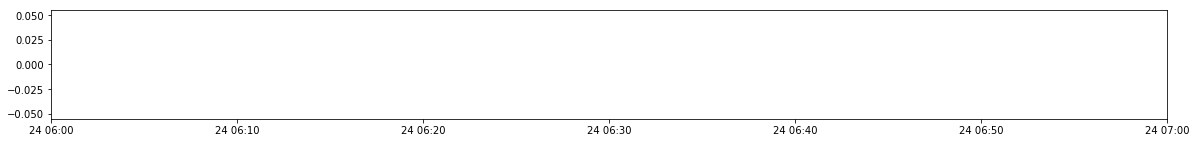

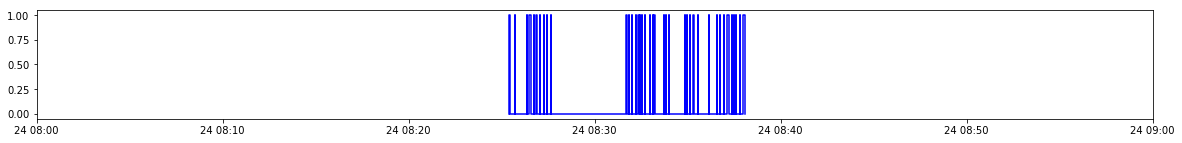

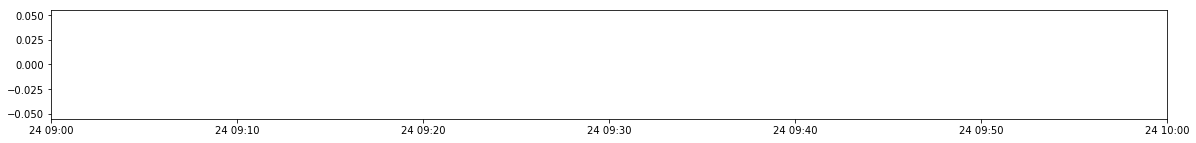

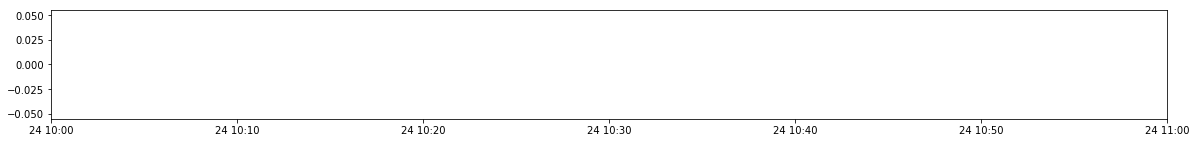

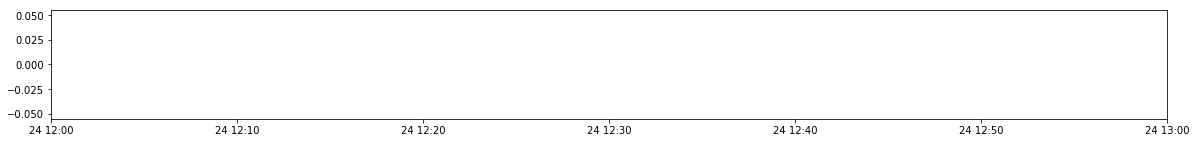

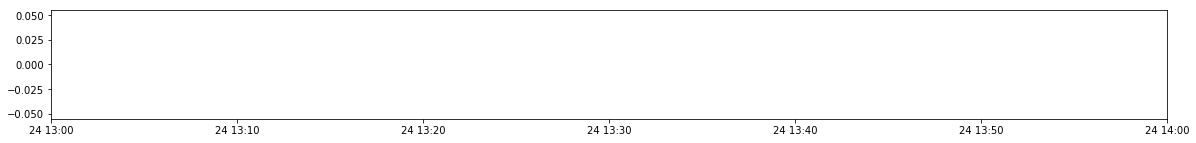

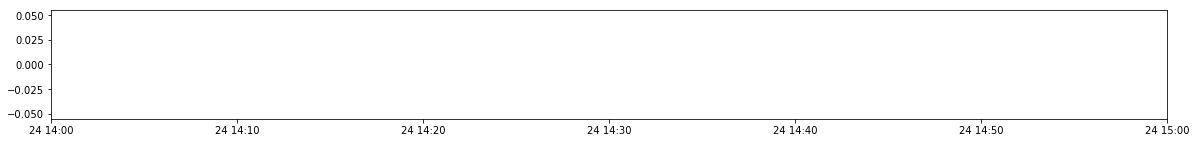

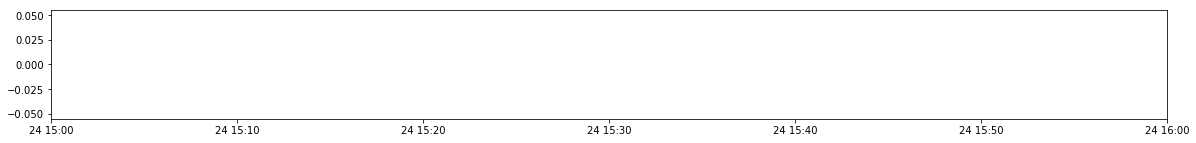

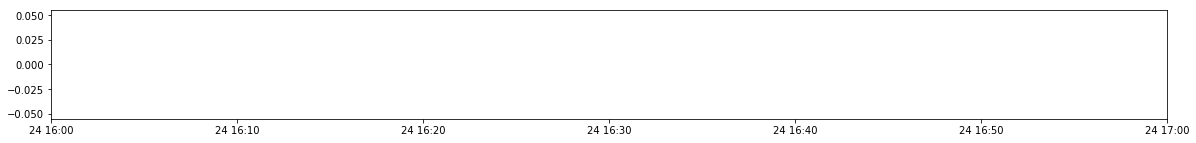

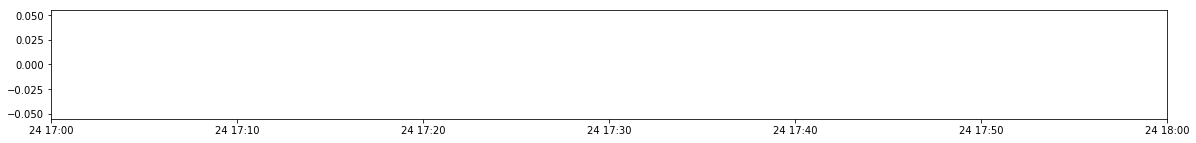

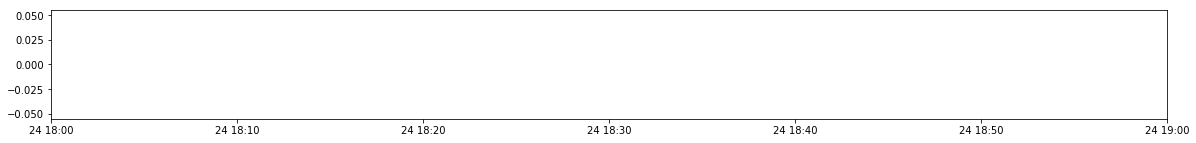

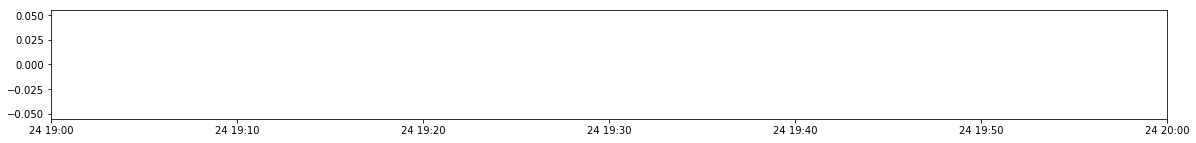

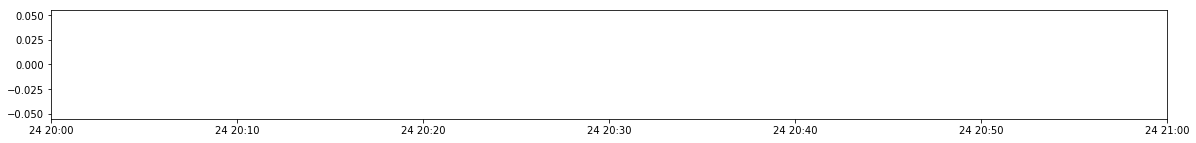

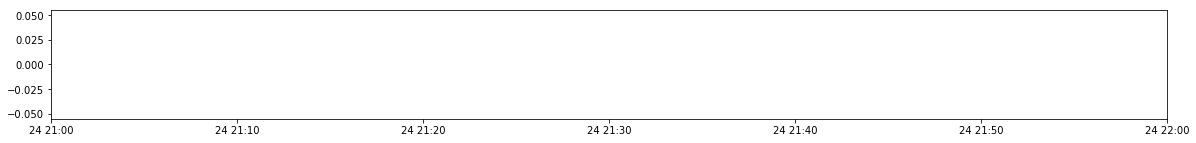

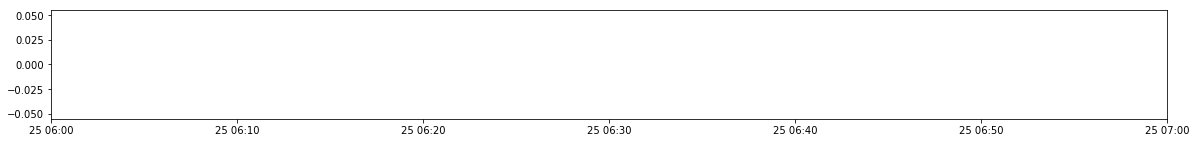

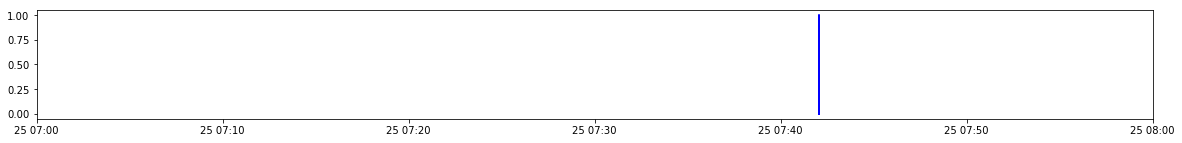

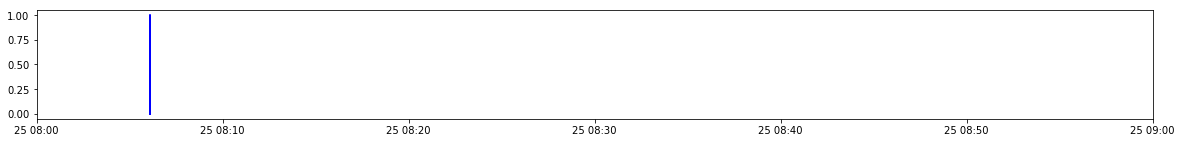

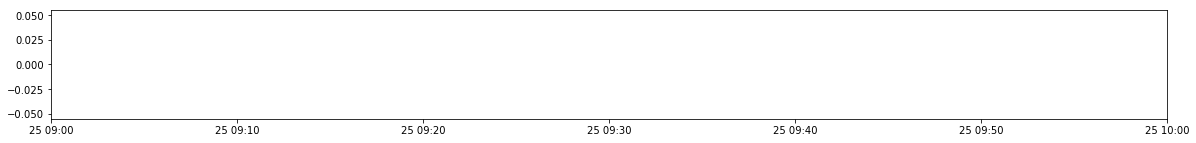

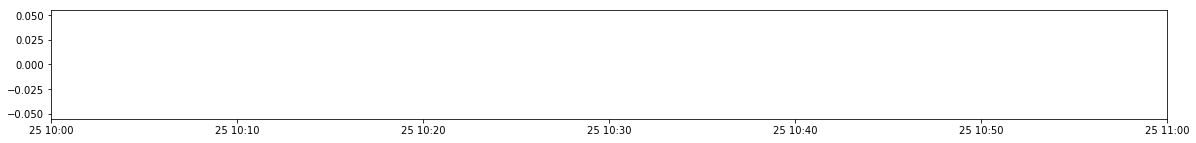

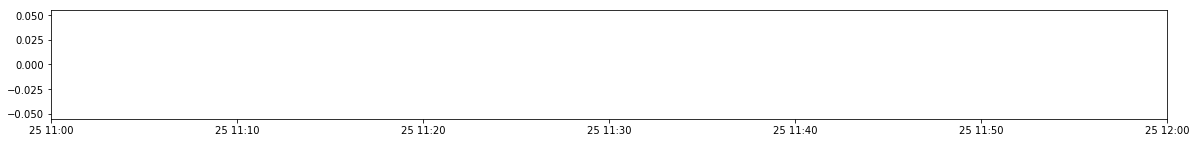

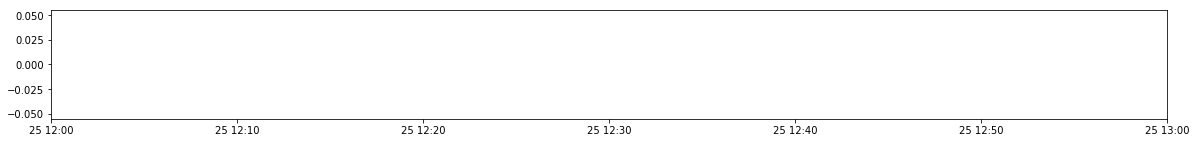

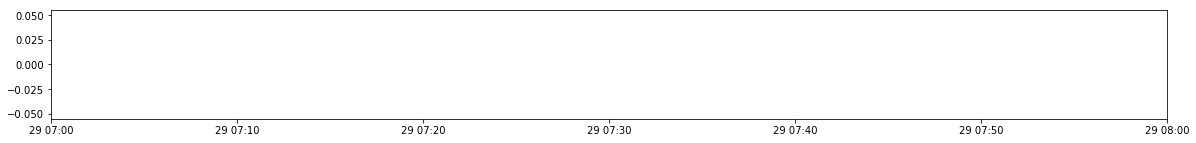

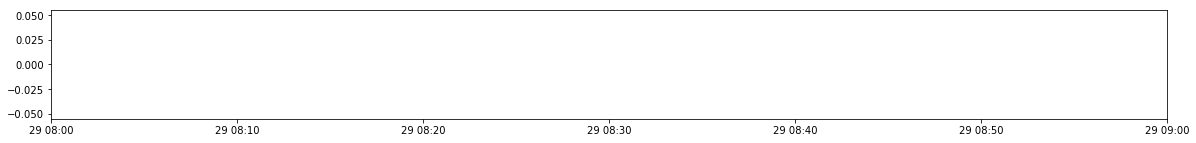

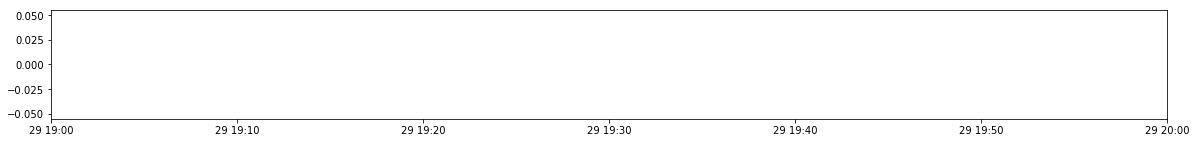

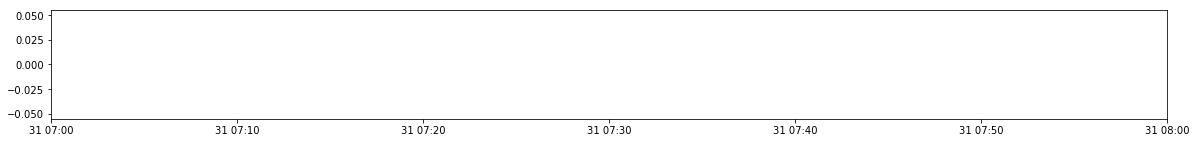

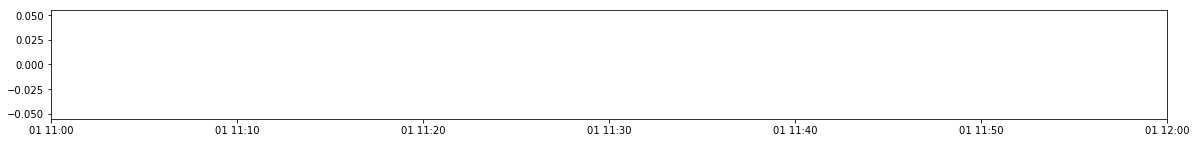

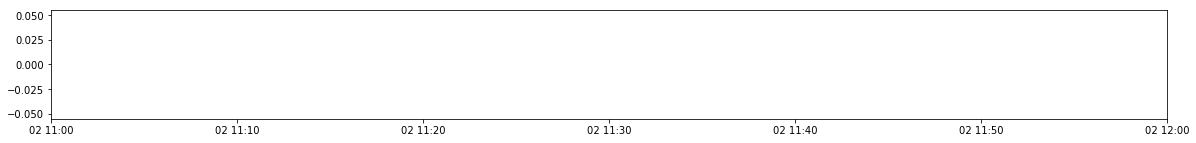

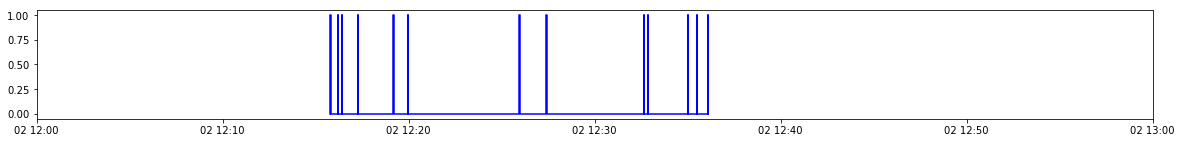

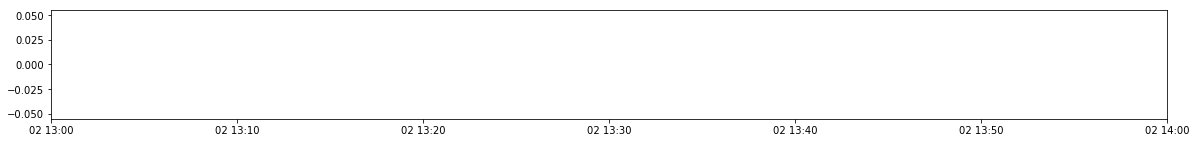

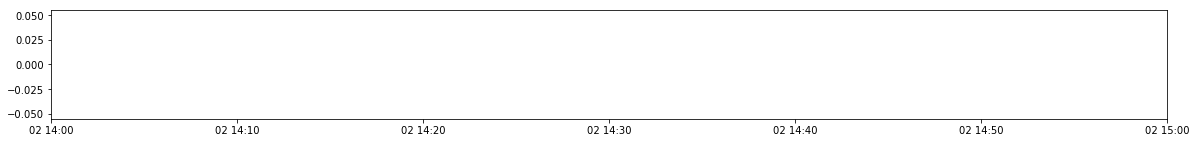

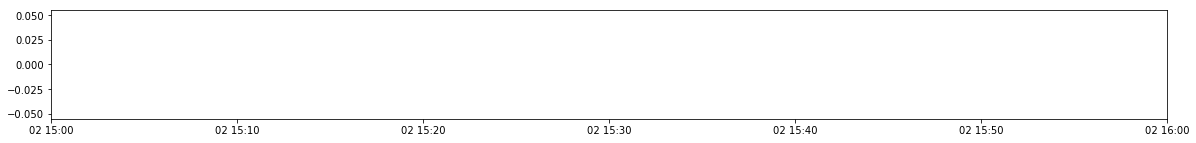

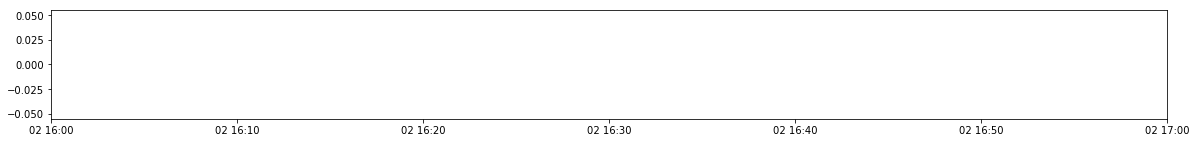

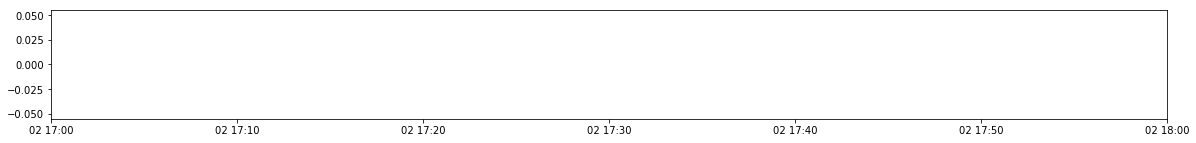

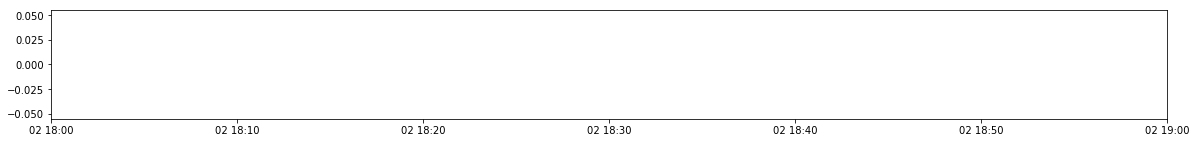

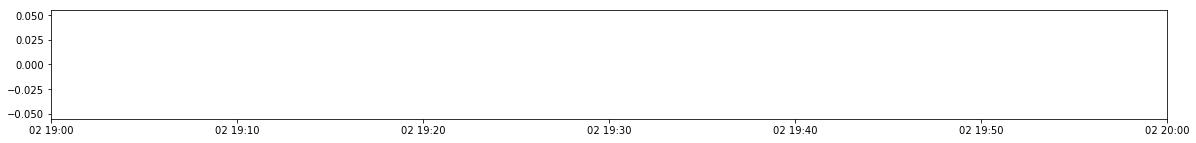

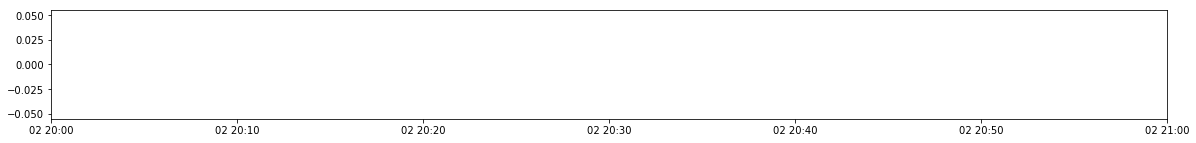

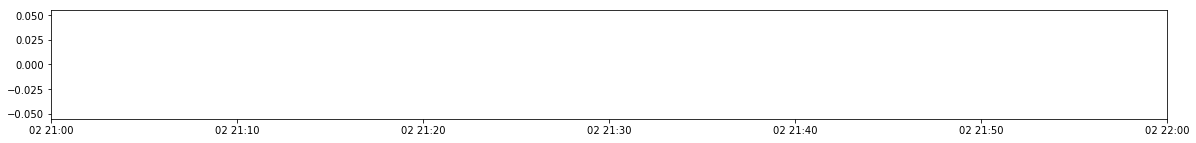

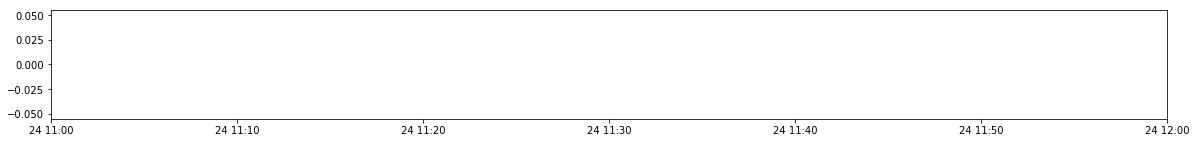

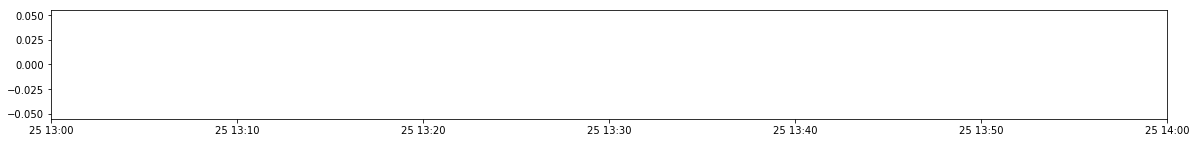

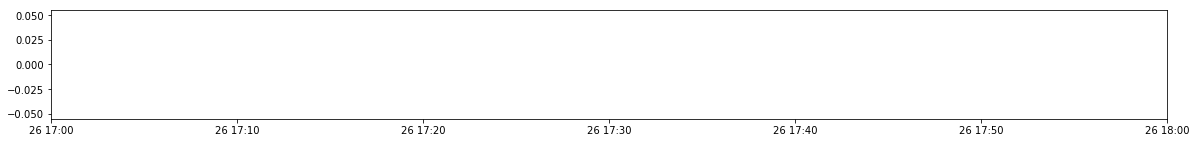

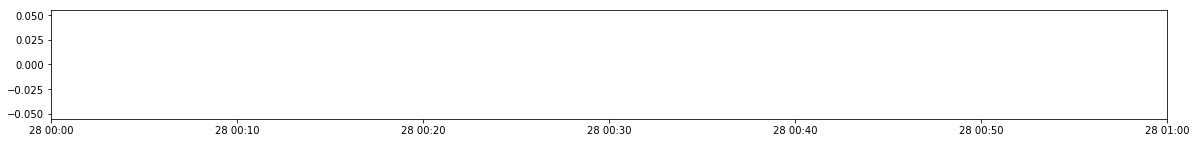

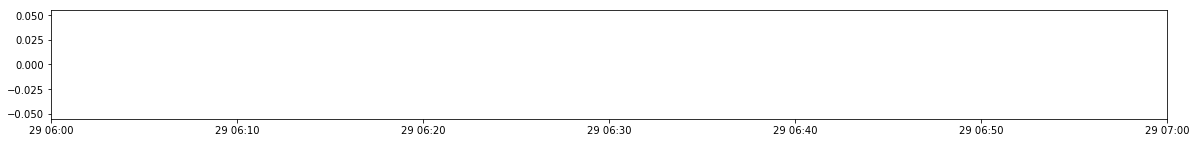

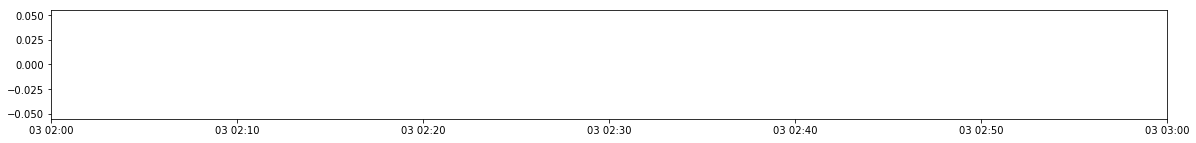

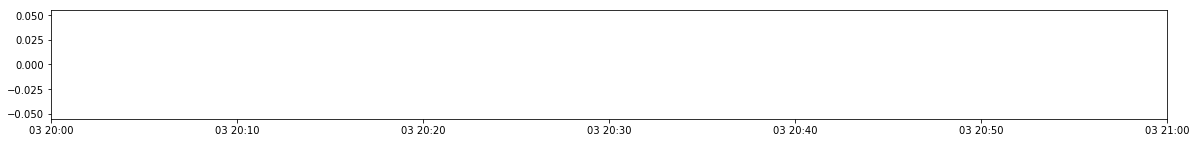

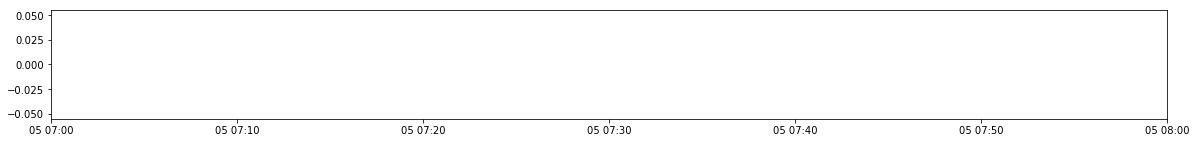

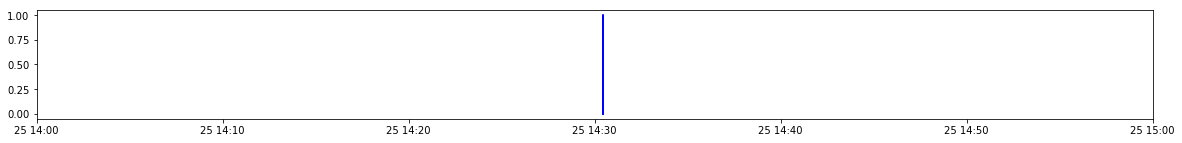

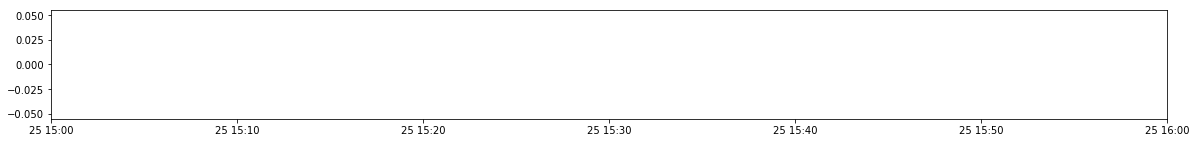

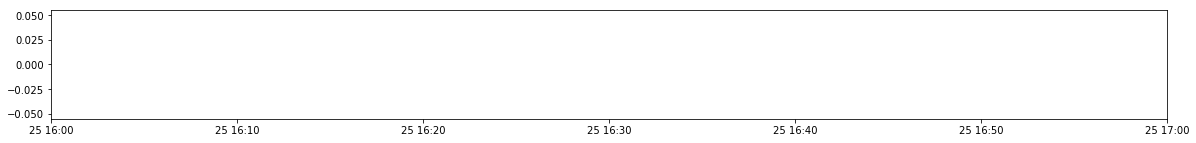

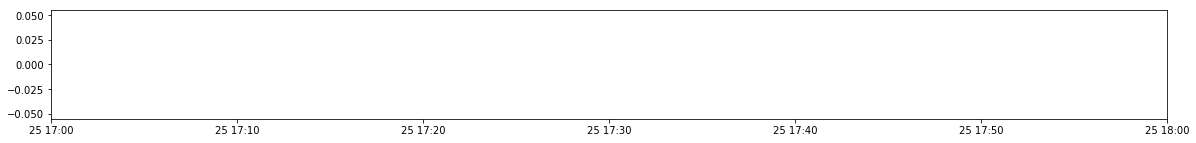

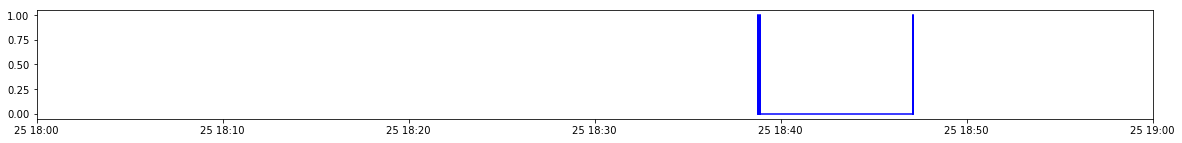

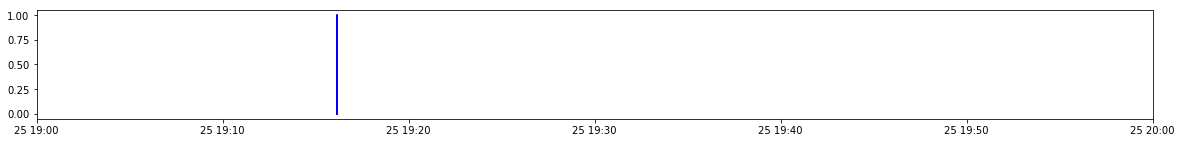

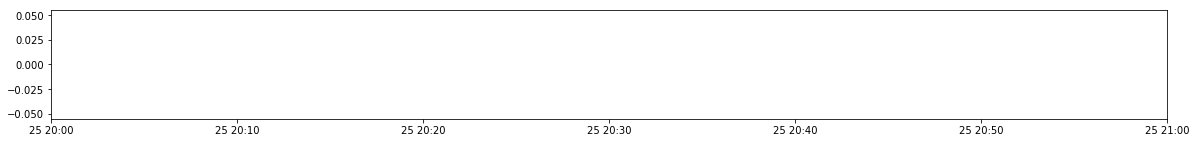

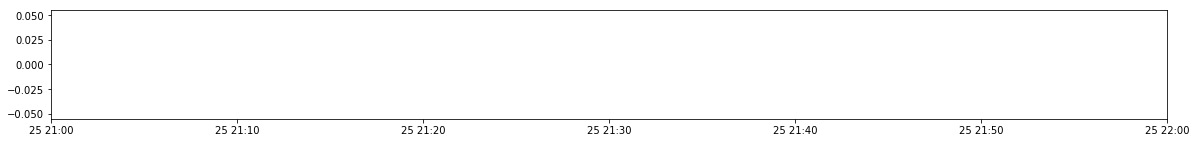

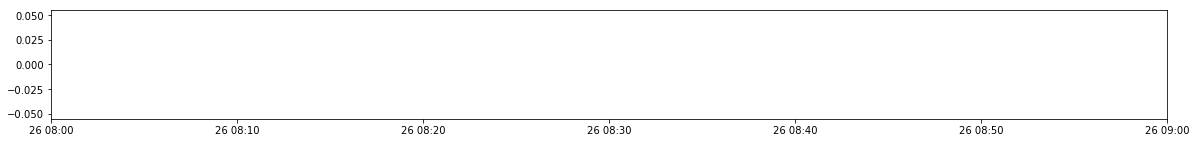

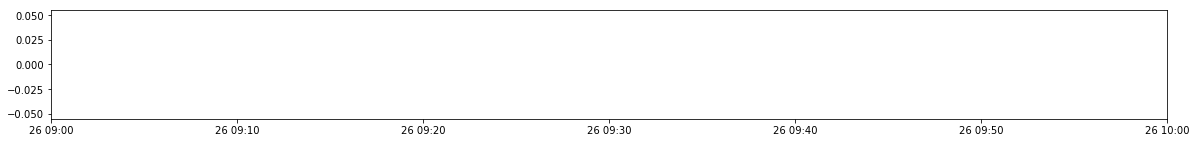

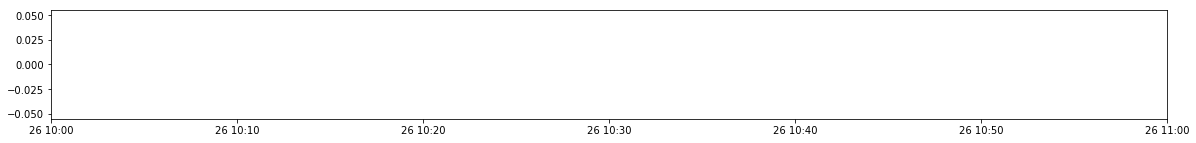

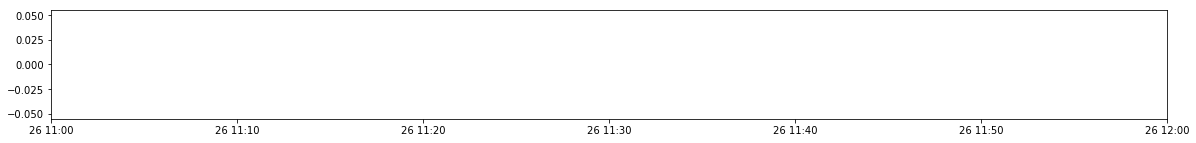

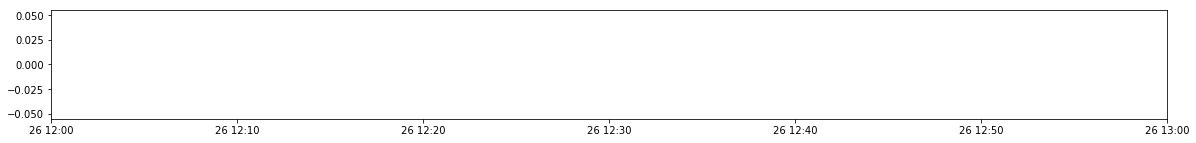

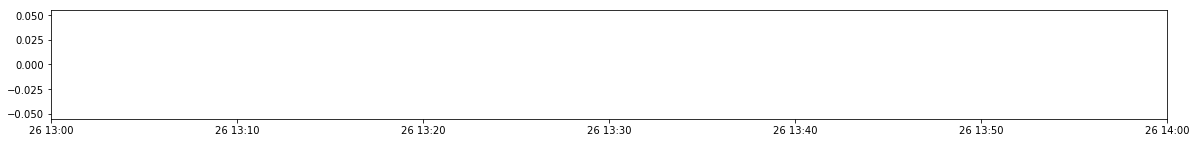

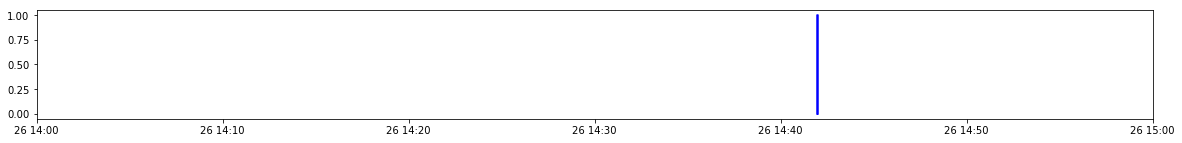

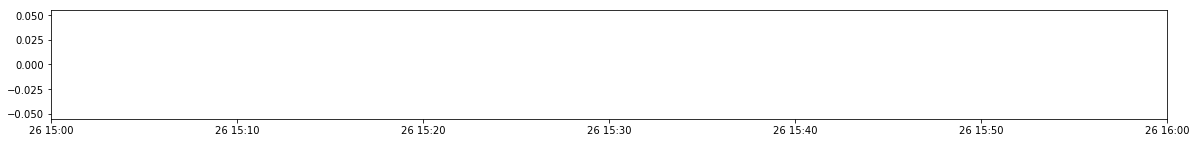

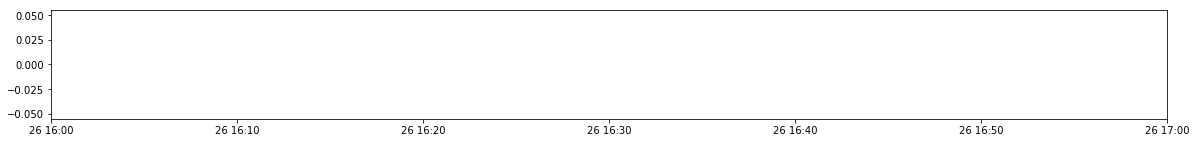

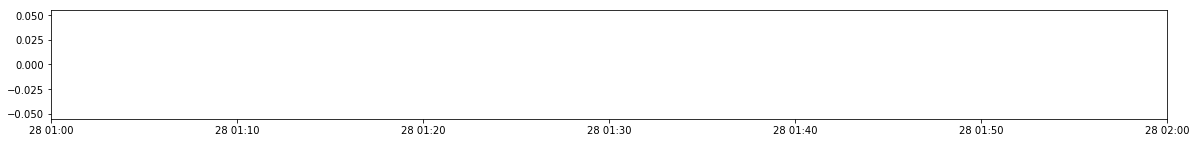

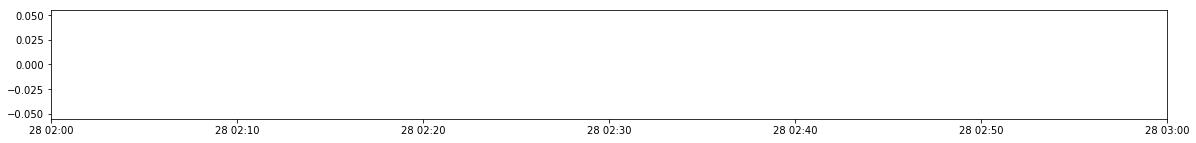

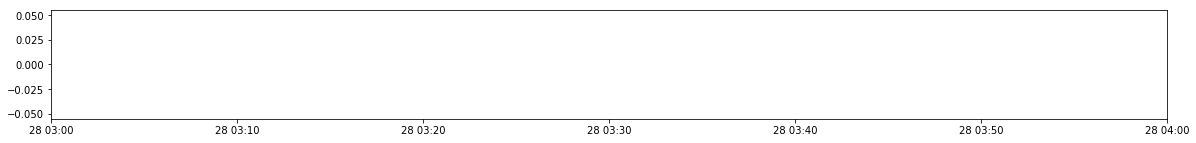

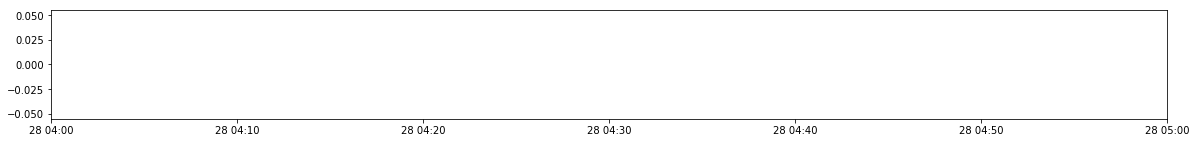

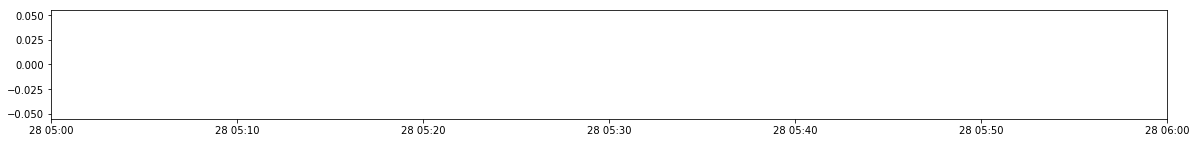

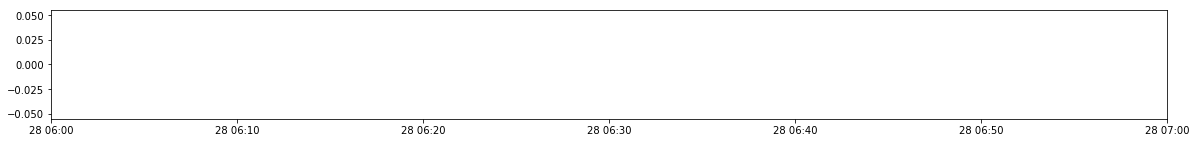

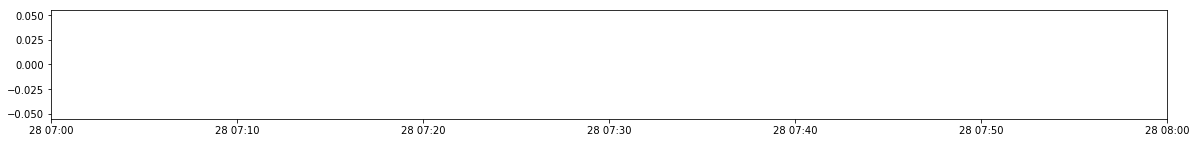

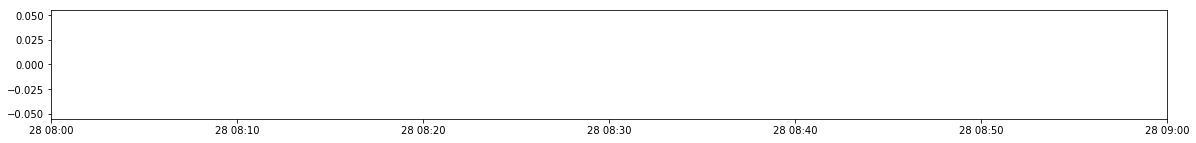

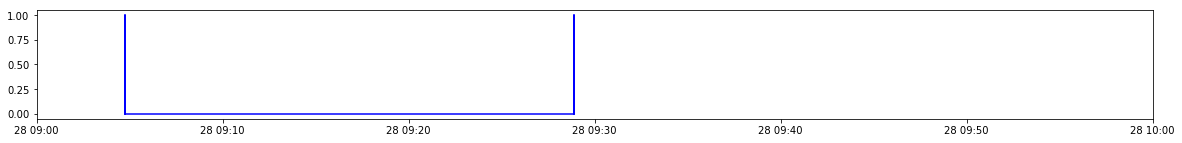

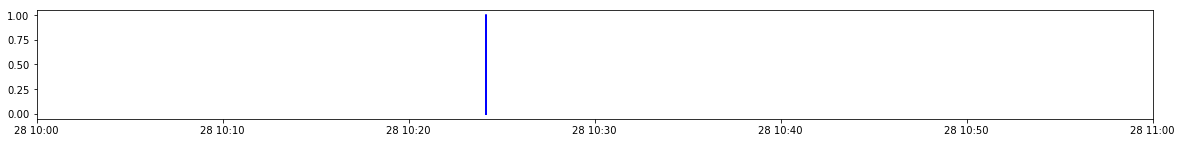

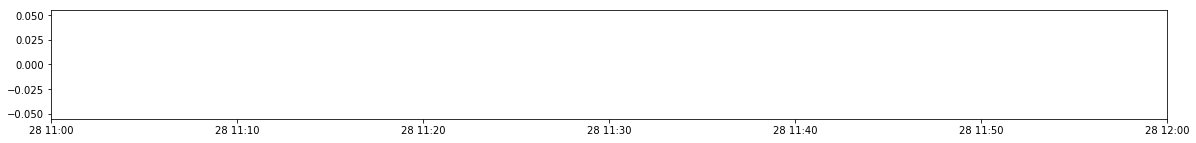

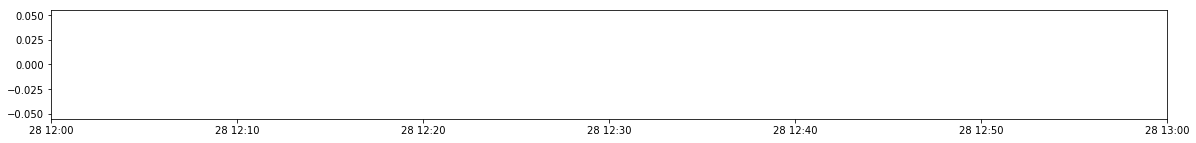

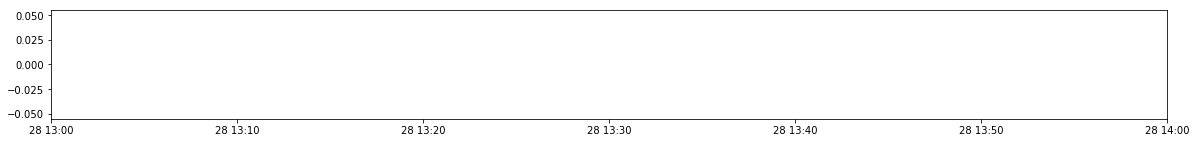

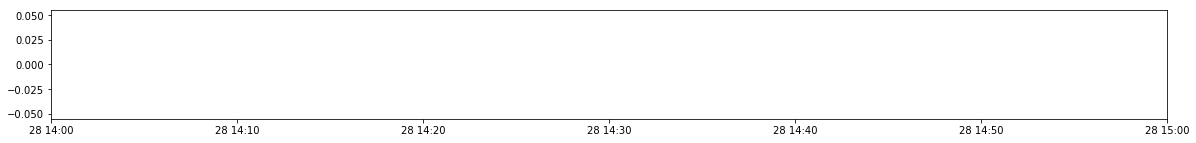

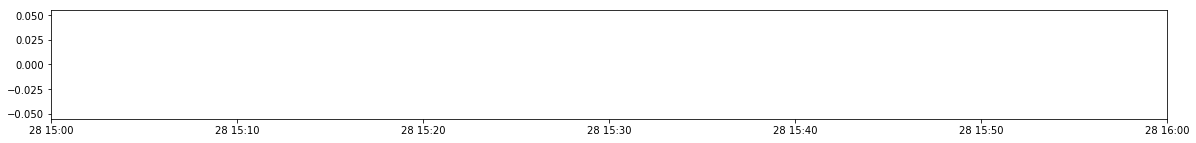

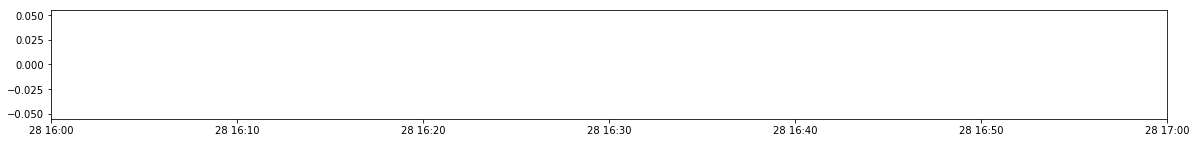

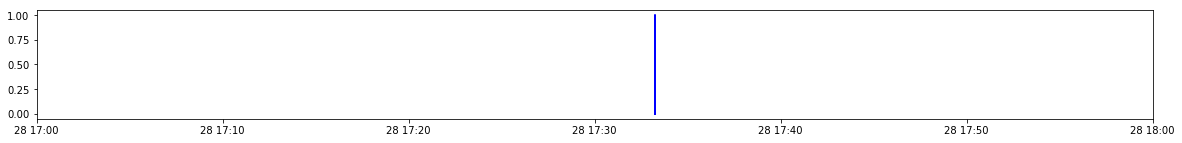

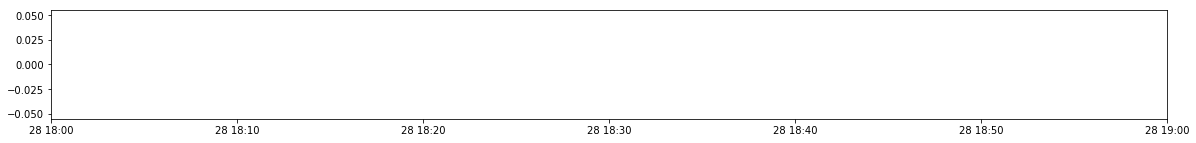

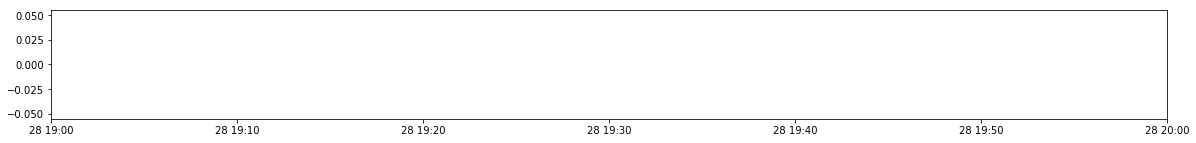

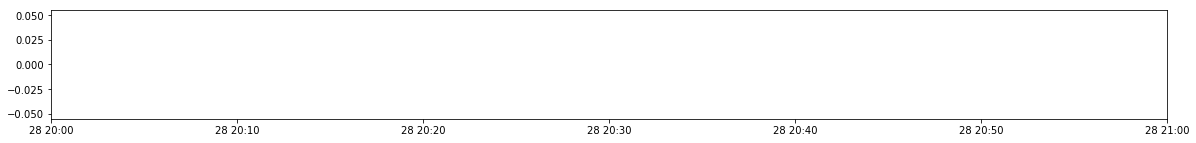

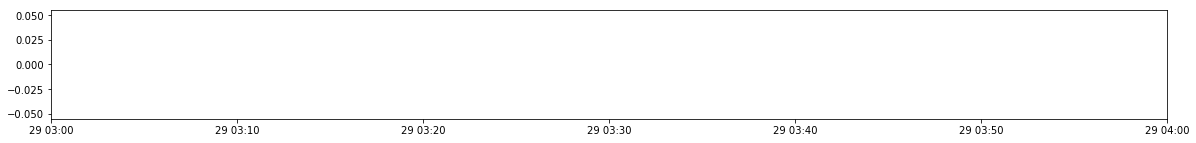

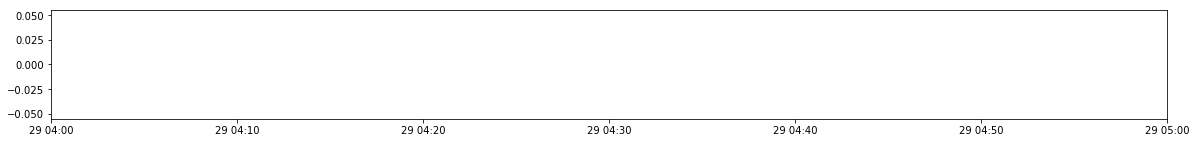

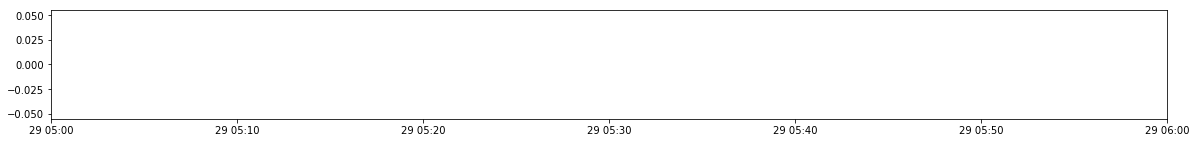

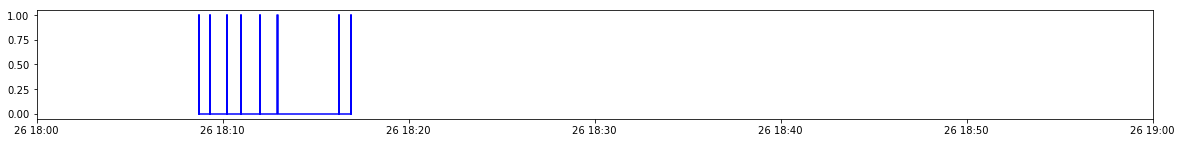

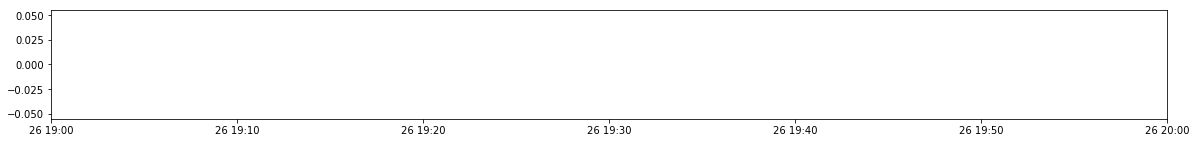

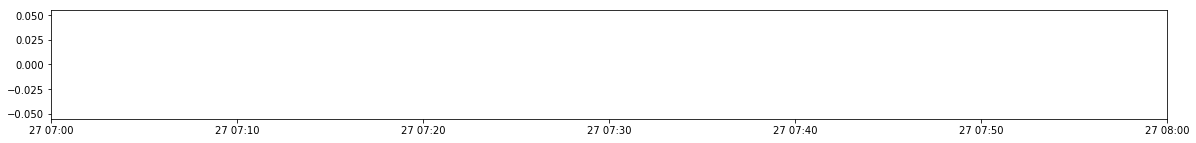

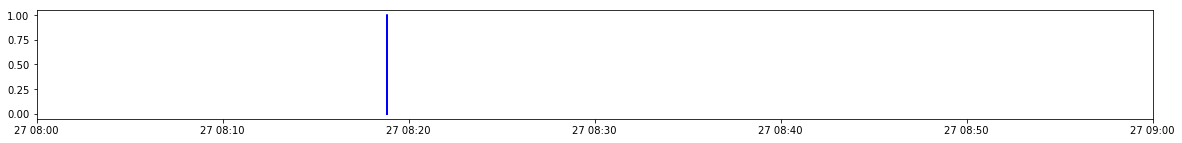

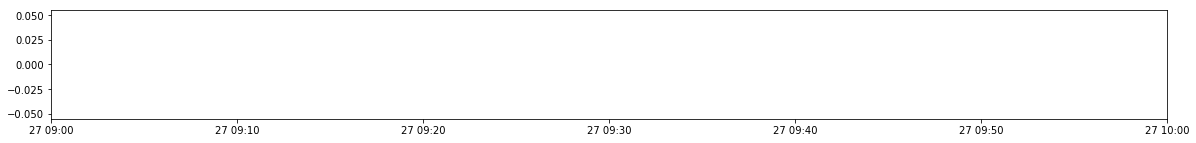

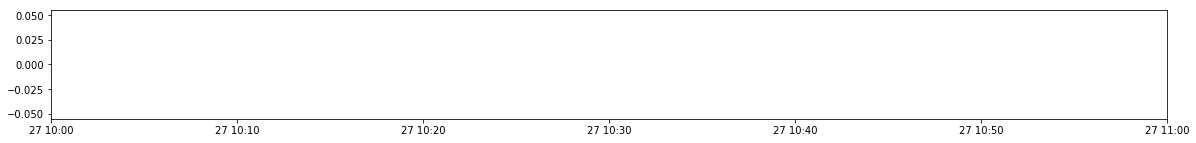

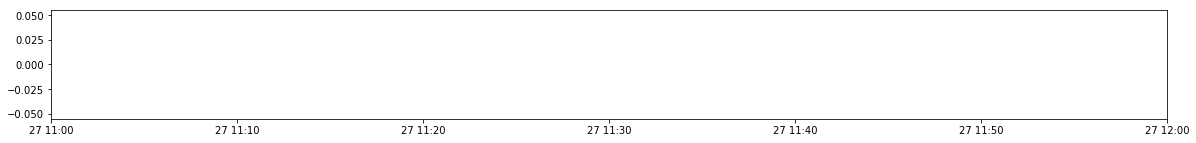

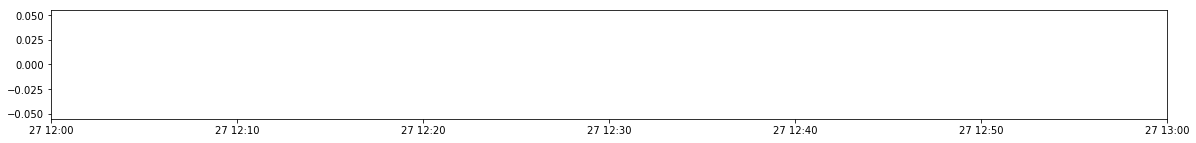

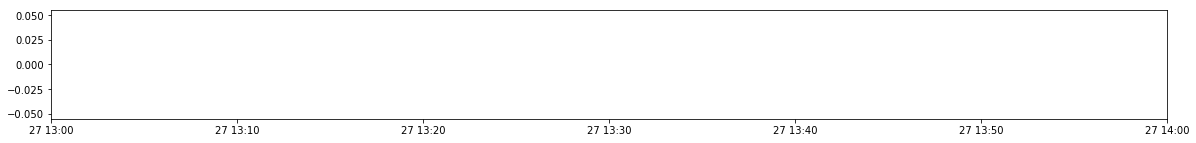

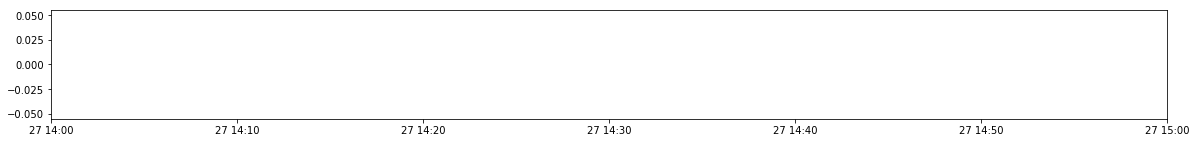

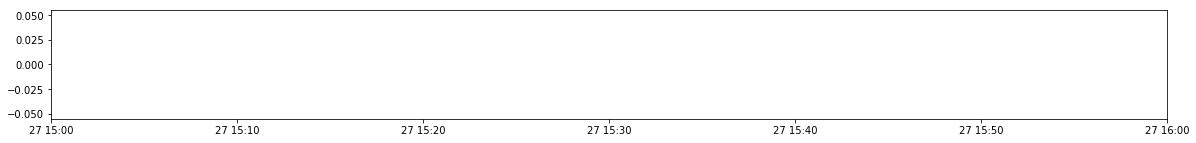

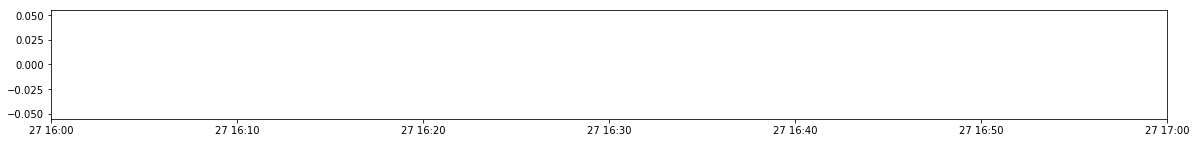

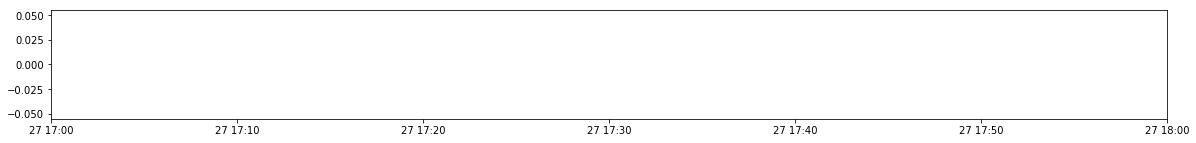

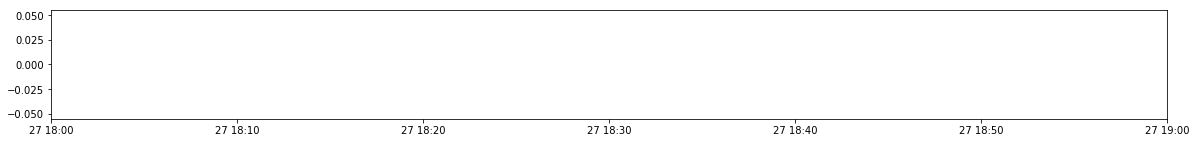

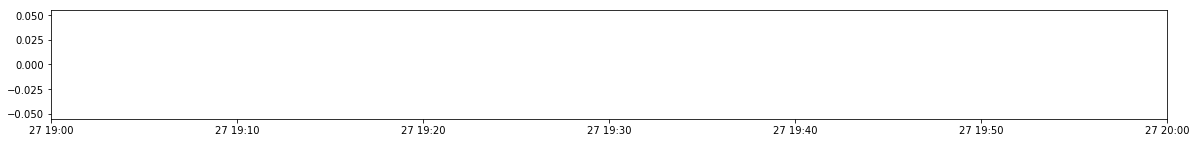

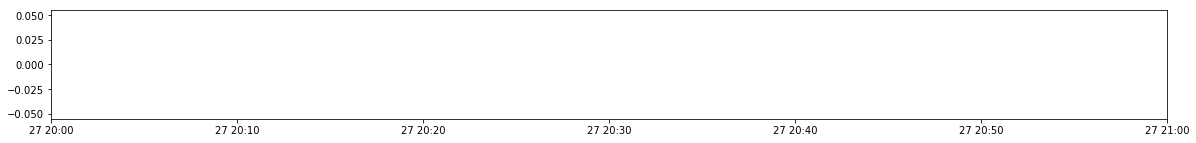

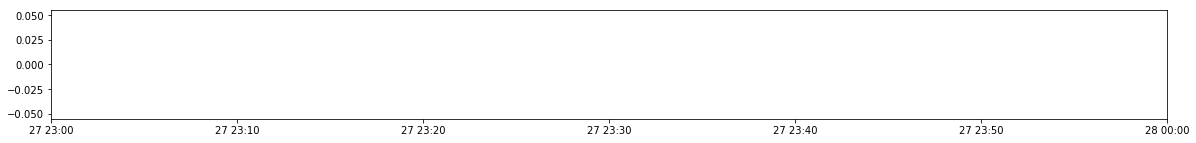

In [3]:
from __future__ import division
import time
import datetime
import csv
from sklearn import svm, neighbors, metrics, cross_validation, preprocessing
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from scipy import *
from scipy.stats import *
from scipy.signal import *
from numpy import *
from beyourself.data.label import read_SYNC
from beyourself.core.util import *

import os
import re
import matplotlib
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
import numpy.polynomial.polynomial as poly
pd.set_option('display.max_rows', 500)

from sklearn import preprocessing
from sklearn.metrics import auc, silhouette_score
from collections import Counter
from sklearn.metrics import *
from sklearn.metrics import precision_recall_fscore_support as score
from datetime import timedelta





# input para: input_data , intervals_of_interest , timeString 
def genFeatsNames( feat_list , sensor_list, extension ):
    header = []

    for key in sensor_list:
        for feat in feat_list:
            one = key + "_" + feat
            header.extend([one])
    header.extend(extension)

    return header



def segment_plot(start, end, height):

    x = []
    y = []

    for s,e,h in zip(start, end, height):
        
        x.append(s)
        y.append(0)

        x.append(s)
        y.append(h)

        x.append(e)
        y.append(h)

        x.append(e)
        y.append(0)

    return x, y





feat_folder = '/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/AccGyr'
ts_folder = '/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/feature/ts/AccGyr'
model_file =  '/Volumes/SHIBO/BeYourself/BeYourself/PROCESS/P120/wrist/model/AccGyr/wrist_0824meals.pkl'
pred_folder = '/Volumes/SHIBO/BeYourself/BeYourself/RESULT/P120/wrist/AccGyr' 

if not os.path.exists(pred_folder):
    os.makedirs(pred_folder)



feat_list = ["mean","var","skew","kurtosis","RMS","median","max","min","qurt3",'quart1']#,'5th_coef','4th_coef','3rd_coef','2nd_coef','1st_coef'
sensor_list = ['accX','accY','accZ','rotX','rotY','rotZ']
extension = ["cov_accXY","cov_accYZ","cov_accXZ"]

head = genFeatsNames(feat_list, sensor_list, extension)



# for hour in ['08-24-17_08.csv']:
for hour in os.listdir(feat_folder):
    hfile = os.path.join(feat_folder, hour)
    tfile = os.path.join(ts_folder, hour)
    print(hfile)

    if hour != ".DS_Store" and os.stat(hfile).st_size != 0:
        # load feature and timestamp
        feat_df = pd.read_csv(hfile, names  = head)
        ts_df = pd.read_csv(tfile, names  = ['Unixtime'])
        
        X_T = feat_df.as_matrix()

        print( "Shape of training data: " + str(X_T.shape))

        # predict and save
        clf = joblib.load(model_file)
        predicted = clf.predict(X_T)
        savetxt(os.path.join(pred_folder, hour), predicted, delimiter=",")


#         print(np.where( predicted == 1 ))
#         print(len(np.where( predicted == 1 )[0]))
        

        print("Shape of Predicted: " + str(predicted.shape))
        print(" ")

        st_list, end_list = point_to_interval_start_end(predicted)
#         print(st_list)
#         print(end_list)
        heights = [1] * len(st_list)
        pred_x, pred_y = segment_plot(st_list, end_list, heights)

#         print(pred_x)
#         print(pred_y)


        pred_x = ts_df.iloc[pred_x]
        pred_x = pred_x['Unixtime'].tolist()


        pred_x = [epoch_to_datetime(i) for i in pred_x]
        start_hour = datetime_from_datafile_name(hour)
        end_hour = start_hour + timedelta(hours=1)



        f1 = plt.figure()
        fig, ax1 = plt.subplots()
        fig.set_size_inches(20,2)
        ax1.plot(pred_x, pred_y,'b', label='pmin')        
        ax1.set_xlim([start_hour, end_hour])






